#**ML Intern Assesment**

**Introduction**

**As per the problem statement the target columns are NFL,NFH, so i have constructed two different model structure which are slightly different they are namely Dependent model construction/implementation &  Independent model construction/implementation, the difference between them is that dependent model structure/implementation ,would perform  training/prediction of   NFH  first based on other features (excluding nfl), once that is completed it would train NFL based on other features along with the values of NFH or in other words NFL model training would depend on NFH values along with that NFL predictions would be made based on predicted values of NFH as presented by the NFH model, and i term this model to be a pipeline model, whereas in the Independent model construction/implementation both NFH,NFL trainings would be performed seperately**


**Queries at this stage**

**1) Can we predict NFL using NFH predicted values in pipeline technique ?**

**A) Yes Sir we can ,but here i have strictly followed the order of the columns mentioned in the original dataset so as a result NFH column came first followed by NFL so hence used the same but if need be we could employ the viceversa also sir**

**Note:Predictions are made using test set, whereas training set is dedicated for model fitting sir**

**Important Note: KIndly run the code cells in order so as to obtain accurate results sir**

**Libraries**

In [ ]:
# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
# Install autogluon (Tutorial based on autogluon==0.1.0)
!pip install autogluon
# Upgrade ipykernel (Necessary for Colab)
!pip install -U ipykernel

In [ ]:
import pandas as pd # Library to process the dataframe
import numpy as np # Library to handle with numpy arrays
import warnings # Library that handles all the types of warnings during execution
import matplotlib.pyplot as plt# Library that handles ploting of  the graphs
warnings.filterwarnings("ignore") # Ignore all the warnings

### **Dataset Preprocessing**

In [ ]:
def process(df):
  # input: unprocessed dataframe
  # output: processed dataframe
  df.reset_index(inplace=True)
  p=list(df.iloc[:,-1].values)
  #p.pop(0)
  df=df.drop(columns=['nfl_data']) # removing the header of dataframe
  df=df.rename(columns={"level_0":"Index","level_1":"Date(IST)","level_2":"NFO","level_3":"NFH","level_4":"NFL","level_5":"NFC","level_6":"FIIB","level_7":"FIIS","level_8":"FIIN","level_9":"DIIB","level_10":"DIIS","level_11":"DIIN","level_12":"August","level_13":"December","level_14":"CAD","level_15":"DAD","level_16":"DOD","level_17":"NDAD","level_18":"Currey","level_19":"Flow","level_20":"Shine"})
  df['Vega']=p
  df=df.drop(0)
  #print(df.columns)
  df=df.drop(columns=['Index'])
  df=df.dropna(how='any')
  df['NFO']=pd.to_numeric(df['NFO']).astype(float)
  df['NFH']=pd.to_numeric(df['NFH']).astype(float)
  df['NFL']=pd.to_numeric(df['NFL']).astype(float)
  df['NFC']=pd.to_numeric(df['NFC']).astype(float)
  df['FIIB']=pd.to_numeric(df['FIIB']).astype(float)
  df['FIIS']=pd.to_numeric(df['FIIS']).astype(float)
  df['FIIN']=pd.to_numeric(df['FIIN']).astype(float)
  df['DIIB']=pd.to_numeric(df['DIIB']).astype(float)
  df['DIIS']=pd.to_numeric(df['DIIS']).astype(float)
  df['August']=pd.to_numeric(df['August']).astype(float)
  df['December']=pd.to_numeric(df['December']).astype(float)
  df['CAD']=pd.to_numeric(df['CAD']).astype(float)
  df['DAD']=pd.to_numeric(df['DAD']).astype(float)
  df['DOD']=pd.to_numeric(df['DOD']).astype(float)
  df['NDAD']=pd.to_numeric(df['NDAD']).astype(float)
  df['Flow']=pd.to_numeric(df['Flow']).astype(float)
  df['Currey']=pd.to_numeric(df['Currey']).astype(float)
  df['Shine']=pd.to_numeric(df['Shine']).astype(float)
  df['Vega']=pd.to_numeric(df['Vega']).astype(float)
  df['nfh']=df['NFH']
  df['nfl']=df['NFL']
  df=df.drop(columns=['NFH','NFL'])
  
  return df

**Gathering and Processing the dataframe**

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df=process(df)
df


Date(IST)           NFO  ...           nfh           nfl
1    2020-01-02  12115.673242  ...  12177.119957  12151.571552
2    2020-01-03  12195.406448  ...  12275.487382  12173.355954
3    2020-01-06  12272.929018  ...  12299.127043  12181.887534
4    2020-01-07  12237.309351  ...  12242.227141  12030.371144
5    2020-01-08  12149.137851  ...  12192.474725  11985.555622
..          ...           ...  ...           ...           ...
352  2021-06-24  15832.780716  ...  15871.734957  15673.598435
353  2021-06-25  15781.799179  ...  15846.875708  15703.024907
354  2021-06-28  15829.576703  ...  15869.452759  15764.937429
355  2021-06-29  15904.676773  ...  15910.968841  15804.933350
356  2021-06-30  15858.319680  ...  15870.707647  15770.343345

[355 rows x 21 columns]

### **Splitting the dataset into the Training set and Test dataframes (70% :train and 30%: test)**

**Note: Shuffling of data is active sir when train/test split occurs ,so as a result every time we run the code different sets of values would be catgeorised as train and test set based on which training and prediction would occur sir**

In [ ]:
df_permutated = df.sample(frac=1)

train_size = 0.7# 70%-train set and 30% -test set
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]


**Saving processed train dataframe as a csv file**

In [ ]:
df_train.reset_index()
df_train.to_csv('train.csv')

In [ ]:
df_train

Date(IST)           NFO  ...           nfh           nfl
197  2020-10-26  11959.809699  ...  11987.042977  11901.337254
223  2020-12-04  13239.231342  ...  13238.521877  13120.329178
20   2020-01-30  12111.127969  ...  12153.140869  12060.059894
85   2020-05-14   9451.695206  ...   9470.314980   9248.908768
237  2020-12-24  13482.954905  ...  13621.364186  13332.485892
..          ...           ...  ...           ...           ...
188  2020-10-13  12043.724888  ...  12105.766782  11961.101557
145  2020-08-10  11182.665466  ...  11240.308078  11139.494824
48   2020-03-13   9972.649848  ...  10036.172659   9569.994728
33   2020-02-19  12104.586698  ...  12116.936165  11988.215908
115  2020-06-26  10409.016913  ...  10499.668023  10314.290855

[248 rows x 21 columns]

**Saving processed test dataframe as a csv file**

In [ ]:
df_test.reset_index()
df_test.to_csv('test.csv')

In [ ]:
df_test

Date(IST)           NFO  ...           nfh           nfl
298  2021-03-31  14538.210165  ...  14723.471177  14495.578329
227  2020-12-10  13497.858862  ...  13584.216045  13485.367160
163  2020-09-04  11556.529502  ...  11600.126799  11497.328496
224  2020-12-07  13240.276875  ...  13306.215213  13189.522621
342  2021-06-10  15844.769418  ...  15866.081846  15675.292748
..          ...           ...  ...           ...           ...
353  2021-06-25  15781.799179  ...  15846.875708  15703.024907
111  2020-06-22  10037.018848  ...  10219.235630  10004.574643
209  2020-11-11  12599.398392  ...  12691.065800  12547.272440
278  2021-03-01  14882.220976  ...  14959.887977  14570.732500
328  2021-05-20  15076.552057  ...  15162.051273  15040.964495

[107 rows x 21 columns]

### **Tuning of Hyper parameters for all the available models**

**Note:**

**1)For certain models i havent tuned the hyper parameters due to the fact the model is able to outperform the dataset without the same,i have allocated the provision to add the hyper parameters which could be used for tuning of models when necessary for boosting the score in the future sir**

**2)For both the dependent model contruction/implementation and independent model construction/implementation, i have performed the training/prediction for both the targeted columns using the same hyperparameter tuning mentioned in the below code cell sir**


In [ ]:
import autogluon.core as ag
from autogluon.tabular import TabularDataset
from autogluon.tabular import TabularPredictor

In [ ]:
# Tuned the Hyperparameters of all models so as to achieve a desired score of 0.91(worst case)-0.98(best case)
# specifies non-default hyperparameter values for neural network models with MX Net backend
nn_options = {  
    'num_epochs': 15,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
    'activation': ag.space.Categorical('tanh','tanh','tanh'), 
    'layers': ag.space.Categorical([100],[1000],[2000],[3000]),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), 
}


nn_options1 = {  
    'num_epochs': 100,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
    'activation': ag.space.Categorical('tanh','tanh','tanh'), 
    'layers': ag.space.Categorical([100],[1000],[2000],[3000]),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), 
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100, 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  
}
XGB_options={
    'tree_method':'auto',
} # specifies non-default hyperparameter values for XG Boost algorithms
Lr_options={}  # specifies non-default hyperparameter values for Linear Regression ,here for this model i have not specified any hyper parameters due to the fact the model performs on the dataset as it is
cat_options={
    'od_type':'Iter',
    'iterations':500
}  # specifies non-default hyperparameter values for Cat boost model.

Xt_options={
    'verbose':2,
    'criterion': 'mse'
} # specifies non-default hyperparameter values for Extremely Randomized Trees
Rf_options={
    'max_features':'auto',
    'criterion': 'mse'
    
} # specifies non-default hyperparameter values for Random forest  
knn_options={
    'weights':'uniform',
    'algorithm':'auto'

} # specifies non-default hyperparameter values for KNN 

fast_options={} # specifies non-default hyperparameter values for neural network with FastAI backend  since documentaion for tuning hyperparameters is not working as given in the library provided by Tabular Predictor hence left it as default
hyperparameters = {  # default hyperparameters of each model type if hyper tuning parameter is chosen
                   'GBM': gbm_options,
                   'NN': nn_options, 
                   'LR':Lr_options,
                   'CAT':cat_options,
                   'XT':Xt_options,
                   'RF':Rf_options,
                   #'FASTAI':fast_options,# due to the fact that this model is not showing much improvement after training hence i have taken the liberty to temporarily remove them
                   'XGB':XGB_options,
                   'KNN':knn_options
                  }  
                  
time_limits = 2*60  # train various models for ~5 min
metric = 'r2'# Choose only from the list given here [‘root_mean_squared_error’, ‘mean_squared_error’, ‘mean_absolute_error’, ‘median_absolute_error’, ‘r2’]
print("\n Note: For hyper parameter tuning we need to specify one of the options from the list of options so as to perform HPO Analysis, if the user  just wants insert the hyperparameters and if they feel that  HPO analysis is not required ,kindly specify None")
print("\n the list of hypertuning parameters for performing HPO Analysis is ['auto',random',''bayesopt','None']")
ht=str(input('\n enter the type of hypertuning parameter for optimizing the model by performing HPO from the above list'))# specifies type of hyper tuning of models from the list given here ['auto',random',''bayesopt']


 the list of hypertuning parameter is ['auto',random',''bayesopt','None']

 enter the type of hypertuning parameter for optimizing the model by performing HPO from the above listauto


**default hyperparameters of each model if hyper tuning is  None**

In [ ]:
def hyp():
  hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options1, 
                   'LR':Lr_options,
                   'CAT':cat_options,
                   'XT':Xt_options,
                   'RF':Rf_options,
                   #'FASTAI':fast_options,# due to the fact that this model is not showing much improvement after training hence i have taken the liberty to temporarily remove them
                   'XGB':XGB_options,
                   'KNN':knn_options
                  } 
  return hyperparameters
  

**Reference Documentation for constructing the same**

In [ ]:
#help(ag.space)

In [ ]:
#help(TabularPredictor.fit)

[Tuning of Hyper parameters](https://auto.gluon.ai/tutorials/tabular_prediction/tabular-indepth.html)

### **Dependent construction/implementation**

### **NFH training/Prediction**

In [ ]:
train_data = TabularDataset('train.csv')
test_data = TabularDataset('test.csv')

Loaded data from: train.csv | Columns = 22 / 22 | Rows = 248 -> 248
Loaded data from: test.csv | Columns = 22 / 22 | Rows = 107 -> 107


**For NFH model fitting/prediction we shall remove actual NFL values as depcited in the order of the columns in the actual dataset**

In [ ]:
date=test_data['Date(IST)']

In [ ]:
train_data

Unnamed: 0   Date(IST)  ...           nfh           nfl
0           197  2020-10-26  ...  11987.042977  11901.337254
1           223  2020-12-04  ...  13238.521877  13120.329178
2            20  2020-01-30  ...  12153.140869  12060.059894
3            85  2020-05-14  ...   9470.314980   9248.908768
4           237  2020-12-24  ...  13621.364186  13332.485892
..          ...         ...  ...           ...           ...
243         188  2020-10-13  ...  12105.766782  11961.101557
244         145  2020-08-10  ...  11240.308078  11139.494824
245          48  2020-03-13  ...  10036.172659   9569.994728
246          33  2020-02-19  ...  12116.936165  11988.215908
247         115  2020-06-26  ...  10499.668023  10314.290855

[248 rows x 22 columns]

In [ ]:
train_data=train_data.drop(columns=['nfl','Unnamed: 0','Date(IST)'])
test_data=test_data.drop(columns=['nfl','Unnamed: 0','Date(IST)'])

In [ ]:
label_column = 'nfh'
print("Summary of  variable: \n", train_data[label_column].describe())

Summary of  variable: 
 count      248.000000
mean     12378.004519
std       2193.166560
min       7819.610704
25%      10918.583187
50%      12034.850657
75%      14623.349952
max      15921.677431
Name: nfh, dtype: float64


In [ ]:
if ht=='None':
  hyperparameters=hyp()
  predictor = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data,time_limit=time_limits,hyperparameters=hyperparameters)
  performance = predictor.evaluate(test_data)
else:
  predictor = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data,time_limit=time_limits,hyperparameters=hyperparameters,hyperparameter_tune_kwargs=ht)
  performance = predictor.evaluate(test_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20210712_043454/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20210712_043454/"
AutoGluon Version:  0.2.0
Train Data Rows:    248
Train Data Columns: 18
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15921.6774310452, 7819.61070394115, 12378.00452, 2193.16656)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12490.19 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column value

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300building tree 22 of 300

building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.3s


building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300building tree 231 of 300

building tree 232 of 300building tree 233 of 300

building tree 234 of 300
building tree 235 of 300
building tree 236 of 300building tree 237 of 300

building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300building tree 247 of 300

building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300building tree 257 of 300
building tree 258 of 300

building tree 259 of 300building tree 260 of 300

building tree 261 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
Fitted model: ExtraTrees ...
	0.9971	 = Validation r2 score
	0.78s	 = Training runtime
	0.1s	 = Validation runtime
Hyperparameter tuning model: XGBoost ...
	Time limit exceeded
Fitted model: XGBoost/T0 ...
	0.9986	 = Validation r2 score
	0.37s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	0.9968	 = Validation r2 score
	0.27s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	0.9987	 = Validation r2 score
	0.32s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	0.9959	 = Validation r2 score
	0.56s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: XGBoo

In [ ]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.999658       0.118062  3.590351                0.000493           0.800696            2       True         51
1           LinearModel   0.999385       0.009314  0.038876                0.009314           0.038876            1       True         43
2            XGBoost/T2   0.998653       0.002610  0.315497                0.002610           0.315497            1       True         34
3            XGBoost/T0   0.998593       0.002789  0.365756                0.002789           0.365756            1       True         32
4          LightGBM/T17   0.997943       0.002349  0.279085                0.002349           0.279085            1       True         19
5          LightGBM/T19   0.997689       0.002293  0.275527                0.002293           0.275527        

In [ ]:
predictor.leaderboard(test_data, silent=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


model  score_test  ...  can_infer  fit_order
0           LinearModel    0.999006  ...       True         43
1   WeightedEnsemble_L2    0.998986  ...       True         51
2            ExtraTrees    0.998676  ...       True         31
3          RandomForest    0.998324  ...       True         24
4           XGBoost/T10    0.998315  ...       True         42
5            XGBoost/T7    0.998086  ...       True         39
6            XGBoost/T4    0.998051  ...       True         36
7            XGBoost/T2    0.998024  ...       True         34
8            XGBoost/T6    0.997944  ...       True         38
9            XGBoost/T9    0.997829  ...       True         41
10           XGBoost/T0    0.997577  ...       True         32
11           XGBoost/T3    0.997577  ...       True         35
12         LightGBM/T20    0.997571  ...       True         22
13         LightGBM/T19    0.997550  ...       True         21
14         LightGBM/T17    0.997478  ...       True         19
15         LightGBM/T21    0.997437  ...       True         23
16         LightGBM/T10    0.997421  ...       True         12
17         LightGBM/T18    0.997374  ...       True         20
18          LightGBM/T8    0.997305  ...       True         10
19         LightGBM/T15    0.996876  ...       True         17
20         LightGBM/T13    0.996739  ...       True         15
21           XGBoost/T5    0.996572  ...       True         37
22         LightGBM/T16    0.996114  ...       True         18
23           XGBoost/T1    0.996035  ...       True         33
24           XGBoost/T8    0.995702  ...       True         40
25          LightGBM/T0    0.995150  ...       True          2
26         LightGBM/T14    0.994074  ...       True         16
27          LightGBM/T4    0.993961  ...       True          6
28          LightGBM/T5    0.993304  ...       True          7
29          LightGBM/T6    0.992880  ...       True          8
30          CatBoost/T0    0.991400  ...       True         25
31          CatBoost/T4    0.989977  ...       True         29
32          LightGBM/T3    0.989159  ...       True          5
33          CatBoost/T3    0.986870  ...       True         28
34          LightGBM/T2    0.986457  ...       True          4
35          LightGBM/T1    0.985003  ...       True          3
36         LightGBM/T12    0.984995  ...       True         14
37          CatBoost/T1    0.951763  ...       True         26
38          CatBoost/T2    0.943976  ...       True         27
39          CatBoost/T5    0.925447  ...       True         30
40           KNeighbors    0.923811  ...       True          1
41          LightGBM/T7    0.817522  ...       True          9
42    NeuralNetMXNet/T6    0.801834  ...       True         50
43    NeuralNetMXNet/T4    0.656103  ...       True         48
44          LightGBM/T9    0.652998  ...       True         11
45    NeuralNetMXNet/T0    0.634214  ...       True         44
46         LightGBM/T11    0.620479  ...       True         13
47    NeuralNetMXNet/T3    0.150536  ...       True         47
48    NeuralNetMXNet/T5   -0.571456  ...       True         49
49    NeuralNetMXNet/T1   -1.015258  ...       True         45
50    NeuralNetMXNet/T2   -1.264211  ...       True         46

[51 rows x 12 columns]

In [ ]:
y_test=test_data['nfh']
test_data=test_data.drop(columns=['nfh'])
test_data

NFO           NFC      FIIB  ...    Flow  Shine      Vega
0    14538.210165  14670.744112   7657.89  ... -0.2185   0.29 -0.210001
1    13497.858862  13568.790119   7663.53  ...  0.3100  -0.27  0.250000
2    11556.529502  11549.656416   4931.66  ... -0.5001  -0.21 -2.849998
3    13240.276875  13278.293515   8796.14  ... -0.0500   0.45  0.509998
4    15844.769418  15740.020665   7447.97  ...  0.2100   0.70 -1.789999
..            ...           ...       ...  ...     ...    ...       ...
102  15781.799179  15763.679655   6766.31  ...  0.1500  -0.08 -0.350000
103  10037.018848  10195.855497   5467.93  ...  0.2453   0.96 -3.349998
104  12599.398392  12690.988077  14549.31  ...  0.0707  -0.15 -1.349998
105  14882.220976  14670.319899   6674.54  ... -0.3126   0.30 -4.600000
106  15076.552057  15088.488792   8149.80  ... -0.3586   0.22 -1.510000

[107 rows x 18 columns]

In [ ]:
y_pred = predictor.predict(test_data)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
Evaluation: r2 on test data: 0.9989862401675959
Evaluations on test data:
{
    "r2": 0.9989862401675959,
    "root_mean_squared_error": -62.513973151760666,
    "mean_squared_error": -3907.996839219055,
    "mean_absolute_error": -35.541383684658996,
    "pearsonr": 0.9995086863835266,
    "median_absolute_error": -22.629959888401572
}


In [ ]:
y_test

0      14723.471177
1      13584.216045
2      11600.126799
3      13306.215213
4      15866.081846
           ...     
102    15846.875708
103    10219.235630
104    12691.065800
105    14959.887977
106    15162.051273
Name: nfh, Length: 107, dtype: float64

In [ ]:
y_pred

0      14683.927734
1      13589.427734
2      11628.555664
3      13308.628906
4      15831.408203
           ...     
102    15832.064453
103    10190.415039
104    12753.082031
105    14829.252930
106    15154.351562
Name: nfh, Length: 107, dtype: float32

In [ ]:
def disp(y_test,y_pred):
  for i in range(len(y_test)):
    for j in range(len(y_test)):
      if i==j:
        print("The actual value of NFH is {0}, the predicted value of NFH for the same is {1}".format(y_test[i],y_pred[j]))
      else:
        continue

In [ ]:
disp(y_test,y_pred)

The actual value of NFH is 14723.471176958, the predicted value of NFH for the same is 14683.927734375
The actual value of NFH is 13584.2160450097, the predicted value of NFH for the same is 13589.427734375
The actual value of NFH is 11600.126799126001, the predicted value of NFH for the same is 11628.5556640625
The actual value of NFH is 13306.2152128452, the predicted value of NFH for the same is 13308.62890625
The actual value of NFH is 15866.0818455306, the predicted value of NFH for the same is 15831.408203125
The actual value of NFH is 9154.9063319648, the predicted value of NFH for the same is 9143.8046875
The actual value of NFH is 13591.420663938501, the predicted value of NFH for the same is 13608.0830078125
The actual value of NFH is 12213.2704411671, the predicted value of NFH for the same is 12234.828125
The actual value of NFH is 13840.2860395541, the predicted value of NFH for the same is 13744.033203125
The actual value of NFH is 13630.236725513501, the predicted value 

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


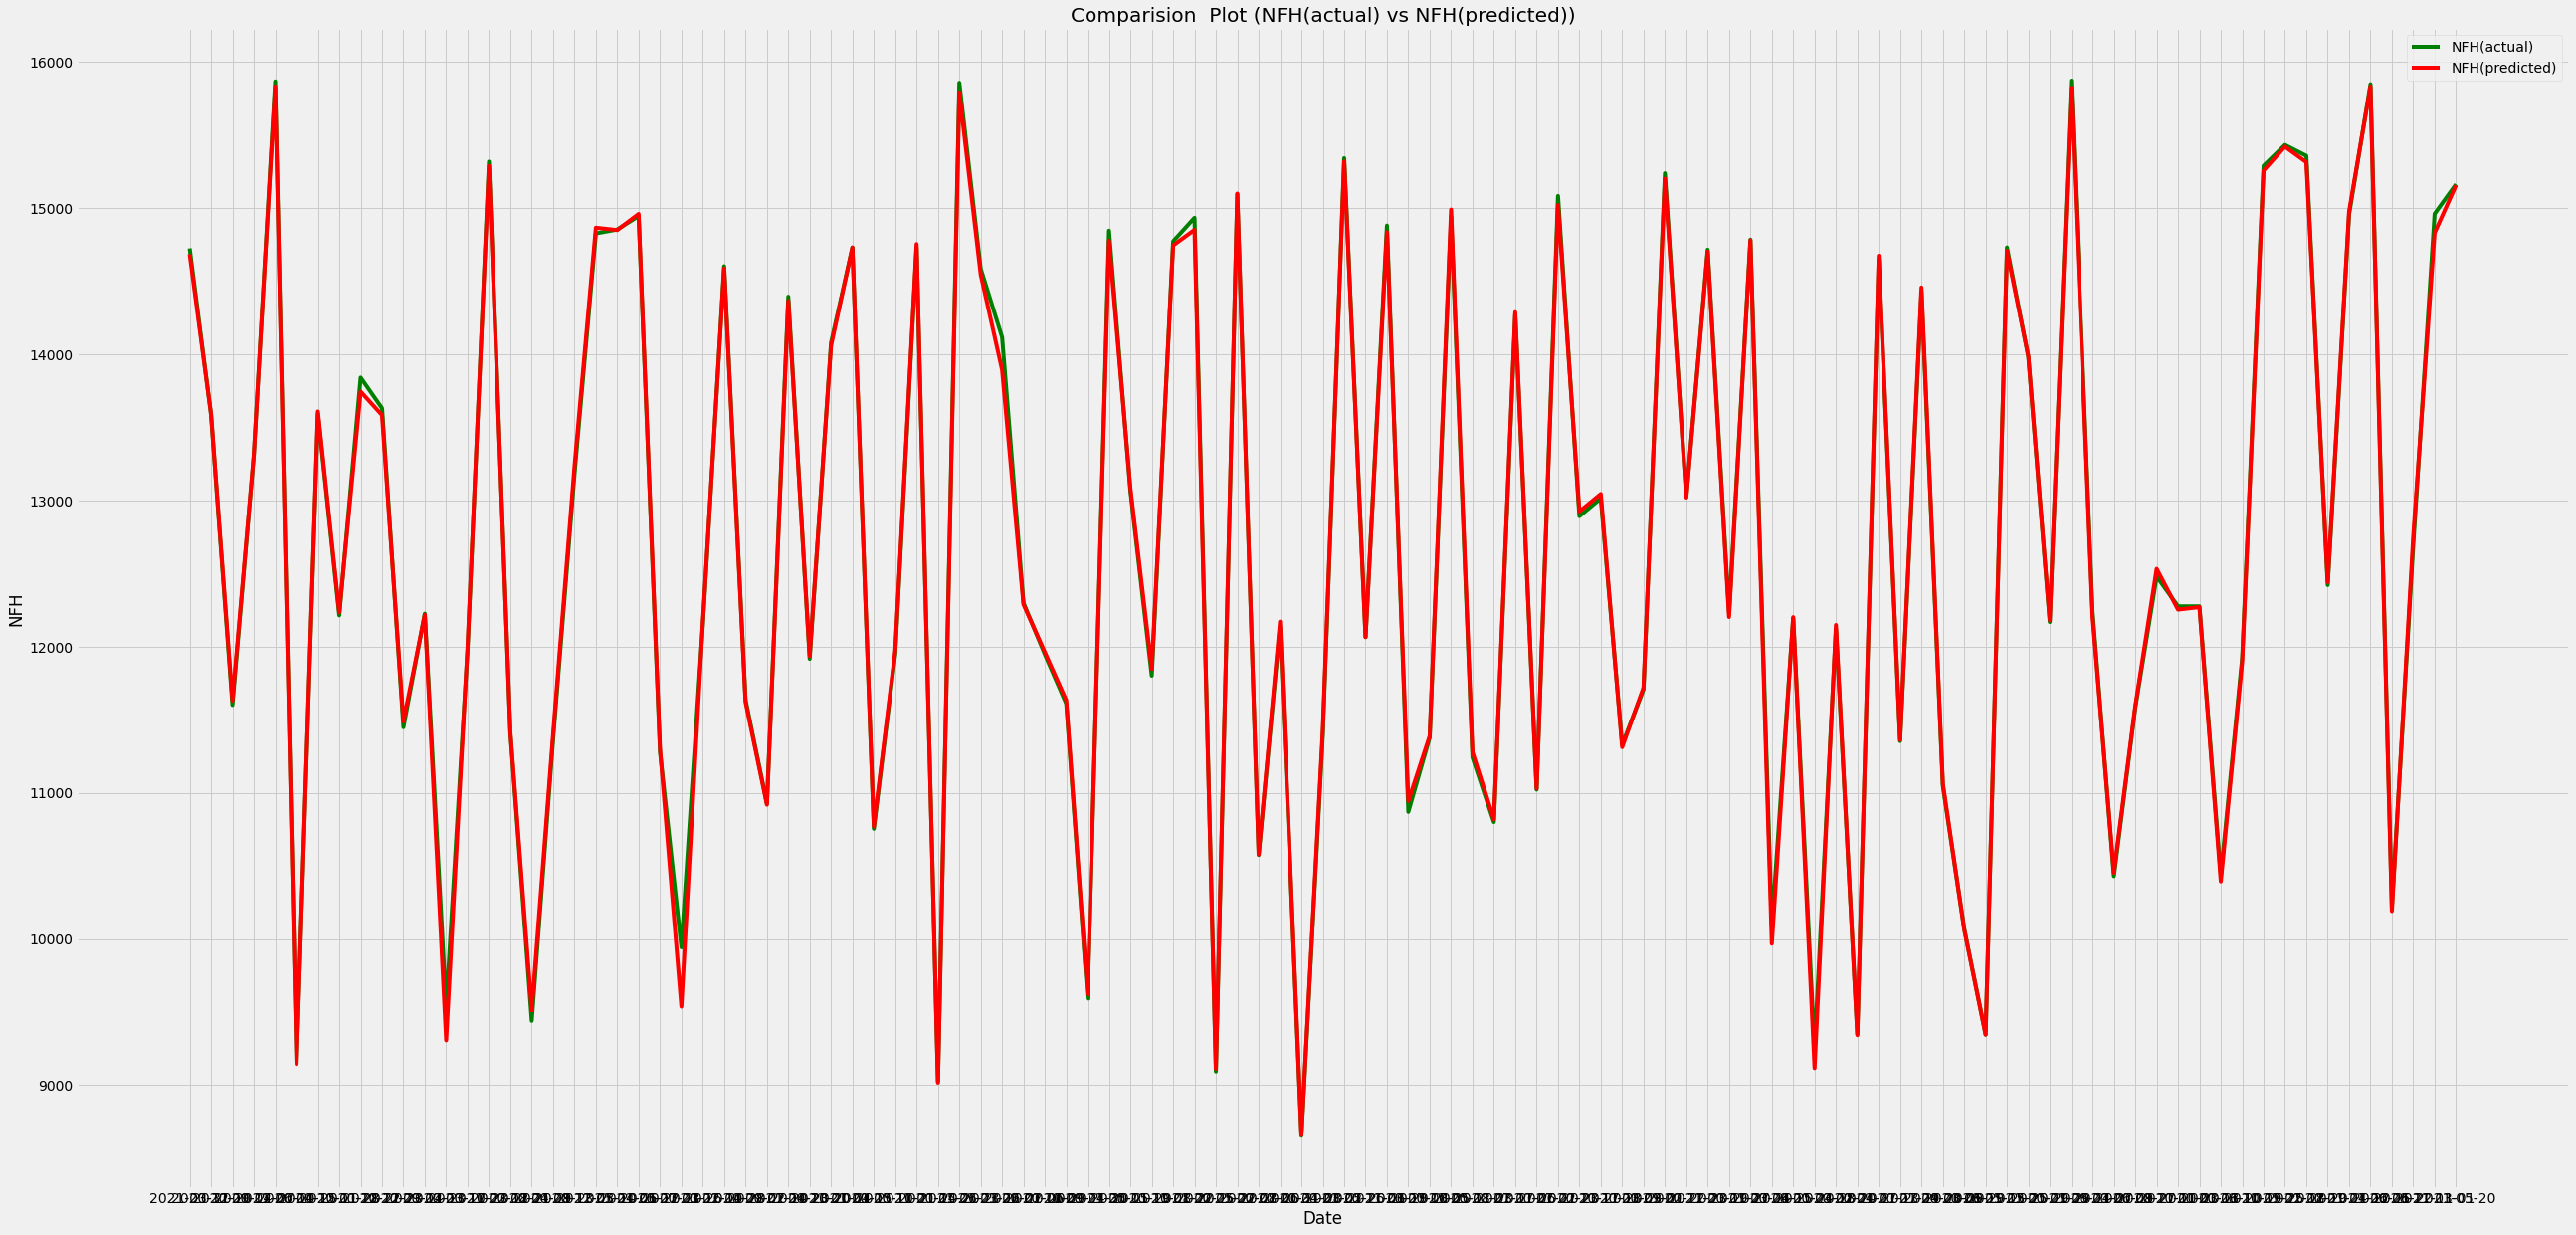

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,y_pred,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


### **NFL training/Prediction**

**Predicting NFL Using Train dataset which has actual samples of NFH and Test dataset which has predicted values of NFH  replacing the actual values so as to accomplish the goal of preditcing both the target columns one after the other ,i would replace the actual values of NFH with the predicted values (y_pred) so as to make predictions for NFL based on the predicted values of NFH and hence i term this mode as pipeline model**

In [ ]:
train_data1 = TabularDataset('train.csv')
test_data1 = TabularDataset('test.csv')

Loaded data from: train.csv | Columns = 22 / 22 | Rows = 248 -> 248
Loaded data from: test.csv | Columns = 22 / 22 | Rows = 107 -> 107


In [ ]:
nfh=test_data1.iloc[:,20]
test_data1.iloc[:,20]=y_pred

In [ ]:
train_data1=train_data1.drop(columns=['Unnamed: 0','Date(IST)'])
test_data1=test_data1.drop(columns=['Unnamed: 0','Date(IST)'])

In [ ]:
label_column = 'nfl'
print("Summary of variable: \n", train_data1[label_column].describe())

Summary of variable: 
 count      248.000000
mean     12188.607816
std       2227.072115
min       7264.768634
25%      10769.707605
50%      11891.391097
75%      14421.116604
max      15814.822034
Name: nfl, dtype: float64


In [ ]:
if ht=='None':
  hyperparameters=hyp()
  predictor1 = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data1,time_limit=time_limits,hyperparameters=hyperparameters)
  performance1 = predictor1.evaluate(test_data1)
else:
  predictor1 = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data1,time_limit=time_limits,hyperparameters=hyperparameters,hyperparameter_tune_kwargs=ht)
  performance1 = predictor1.evaluate(test_data1)

No path specified. Models will be saved in: "AutogluonModels/ag-20210712_043558/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20210712_043558/"
AutoGluon Version:  0.2.0
Train Data Rows:    248
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15814.8220341054, 7264.76863366667, 12188.60782, 2227.07211)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12470.18 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column value

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300building tree 8 of 300

building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300building tree 13 of 300

building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300building tree 19 of 300

building tree 20 of 300
building tree 21 of 300building tree 22 of 300

building tree 23 of 300
building tree 24 of 300
building tree 25 of 300building tree 26 of 300

building tree 27 of 300
building tree 28 of 300
building tree 29 of 300building tree 30 of 300

building tree 31 of 300
building tree 32 of 300building tree 33 of 300

building tree 34 of 300
building tree 35 of 300
building tree 36 of 300building tree 37 of 300

building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.3s


building tree 216 of 300
building tree 217 of 300
building tree 218 of 300

building tree 219 of 300building tree 220 of 300

building tree 221 of 300building tree 222 of 300

building tree 223 of 300building tree 224 of 300

building tree 225 of 300
building tree 226 of 300
building tree 227 of 300building tree 228 of 300

building tree 229 of 300building tree 230 of 300

building tree 231 of 300building tree 232 of 300

building tree 233 of 300
building tree 234 of 300
building tree 235 of 300building tree 236 of 300

building tree 237 of 300building tree 238 of 300

building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300building tree 244 of 300

building tree 245 of 300
building tree 246 of 300building tree 247 of 300

building tree 248 of 300building tree 249 of 300

building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
Fitted model: ExtraTrees ...
	0.9975	 = Validation r2 score
	0.77s	 = Training runtime
	0.1s	 = Validation runtime
Hyperparameter tuning model: XGBoost ...
	Time limit exceeded
Fitted model: XGBoost/T0 ...
	0.9988	 = Validation r2 score
	0.45s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	0.9983	 = Validation r2 score
	0.27s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	0.9949	 = Validation r2 score
	2.14s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	0.9957	 = Validation r2 score
	0.87s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoo

In [ ]:
results1 = predictor1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.999400       0.127396  3.672481                0.000623           0.744942            2       True         47
1            XGBoost/T9   0.999156       0.007769  2.175274                0.007769           2.175274            1       True         41
2           LinearModel   0.999142       0.009142  0.031976                0.009142           0.031976            1       True         42
3            XGBoost/T7   0.998847       0.002935  0.523075                0.002935           0.523075            1       True         39
4            XGBoost/T0   0.998810       0.002964  0.447293                0.002964           0.447293            1       True         32
5            XGBoost/T1   0.998314       0.002763  0.271624                0.002763           0.271624        

In [ ]:
predictor1.leaderboard(test_data1, silent=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


model  score_test  ...  can_infer  fit_order
0            ExtraTrees    0.997960  ...       True         31
1            XGBoost/T8    0.997942  ...       True         40
2   WeightedEnsemble_L2    0.997894  ...       True         47
3            XGBoost/T2    0.997885  ...       True         34
4           LinearModel    0.997833  ...       True         42
5          RandomForest    0.997614  ...       True         24
6          LightGBM/T16    0.997401  ...       True         18
7          LightGBM/T20    0.997267  ...       True         22
8            XGBoost/T9    0.997236  ...       True         41
9            XGBoost/T3    0.997157  ...       True         35
10           XGBoost/T4    0.997087  ...       True         36
11           XGBoost/T7    0.997039  ...       True         39
12         LightGBM/T12    0.996905  ...       True         14
13         LightGBM/T21    0.996658  ...       True         23
14         LightGBM/T14    0.996553  ...       True         16
15         LightGBM/T11    0.996478  ...       True         13
16           XGBoost/T1    0.996338  ...       True         33
17          LightGBM/T6    0.996252  ...       True          8
18          LightGBM/T9    0.996138  ...       True         11
19         LightGBM/T15    0.996036  ...       True         17
20           XGBoost/T6    0.996023  ...       True         38
21          LightGBM/T0    0.995751  ...       True          2
22           XGBoost/T0    0.995723  ...       True         32
23         LightGBM/T13    0.995661  ...       True         15
24         LightGBM/T19    0.995544  ...       True         21
25           XGBoost/T5    0.995188  ...       True         37
26         LightGBM/T10    0.994791  ...       True         12
27         LightGBM/T18    0.994354  ...       True         20
28          CatBoost/T3    0.993876  ...       True         28
29          LightGBM/T7    0.993305  ...       True          9
30          LightGBM/T3    0.991532  ...       True          5
31          LightGBM/T5    0.990787  ...       True          7
32          LightGBM/T4    0.990337  ...       True          6
33          CatBoost/T5    0.988903  ...       True         30
34          CatBoost/T0    0.988534  ...       True         25
35          CatBoost/T4    0.987755  ...       True         29
36         LightGBM/T17    0.984863  ...       True         19
37          CatBoost/T1    0.969823  ...       True         26
38          CatBoost/T2    0.960697  ...       True         27
39          LightGBM/T8    0.950362  ...       True         10
40           KNeighbors    0.948760  ...       True          1
41          LightGBM/T2    0.794883  ...       True          4
42          LightGBM/T1    0.721204  ...       True          3
43    NeuralNetMXNet/T0    0.640907  ...       True         43
44    NeuralNetMXNet/T1   -1.012152  ...       True         44
45    NeuralNetMXNet/T3   -1.142848  ...       True         46
46    NeuralNetMXNet/T2   -1.210814  ...       True         45

[47 rows x 12 columns]

In [ ]:
y_test1=test_data1['nfl']
test_data1=test_data1.drop(columns=['nfl'])
test_data1

NFO           NFC      FIIB  ...  Shine      Vega           nfh
0    14538.210165  14670.744112   7657.89  ...   0.29 -0.210001  14683.927734
1    13497.858862  13568.790119   7663.53  ...  -0.27  0.250000  13589.427734
2    11556.529502  11549.656416   4931.66  ...  -0.21 -2.849998  11628.555664
3    13240.276875  13278.293515   8796.14  ...   0.45  0.509998  13308.628906
4    15844.769418  15740.020665   7447.97  ...   0.70 -1.789999  15831.408203
..            ...           ...       ...  ...    ...       ...           ...
102  15781.799179  15763.679655   6766.31  ...  -0.08 -0.350000  15832.064453
103  10037.018848  10195.855497   5467.93  ...   0.96 -3.349998  10190.415039
104  12599.398392  12690.988077  14549.31  ...  -0.15 -1.349998  12753.082031
105  14882.220976  14670.319899   6674.54  ...   0.30 -4.600000  14829.252930
106  15076.552057  15088.488792   8149.80  ...   0.22 -1.510000  15154.351562

[107 rows x 19 columns]

In [ ]:
y_pred1 = predictor1.predict(test_data1)
perf1 = predictor1.evaluate_predictions(y_true=y_test1, y_pred=y_pred1, auxiliary_metrics=True)

Evaluation: r2 on test data: 0.9978943111476667
Evaluations on test data:
{
    "r2": 0.9978943111476667,
    "root_mean_squared_error": -91.47203914965205,
    "mean_squared_error": -8367.133946195476,
    "mean_absolute_error": -51.4735702733984,
    "pearsonr": 0.998957716449896,
    "median_absolute_error": -30.476408336899112
}


In [ ]:
y_test1

0      14495.578329
1      13485.367160
2      11497.328496
3      13189.522621
4      15675.292748
           ...     
102    15703.024907
103    10004.574643
104    12547.272440
105    14570.732500
106    15040.964495
Name: nfl, Length: 107, dtype: float64

In [ ]:
y_pred1

0      14474.773438
1      13419.956055
2      11442.902344
3      13152.391602
4      15675.072266
           ...     
102    15676.916992
103     9930.733398
104    12552.425781
105    14620.070312
106    14973.320312
Name: nfl, Length: 107, dtype: float32

In [ ]:
def disp1(y_test,y_pred):
  for i in range(len(y_test)):
    for j in range(len(y_test)):
      if i==j:
        print("The actual value of NFL is {0}, the predicted value of NFL for the same is {1}".format(y_test[i],y_pred[j]))
      else:
        continue

In [ ]:
disp1(y_test1,y_pred1)

The actual value of NFL is 14495.5783290224, the predicted value of NFL for the same is 14474.7734375
The actual value of NFL is 13485.367160136202, the predicted value of NFL for the same is 13419.9560546875
The actual value of NFL is 11497.3284958669, the predicted value of NFL for the same is 11442.90234375
The actual value of NFL is 13189.5226214304, the predicted value of NFL for the same is 13152.3916015625
The actual value of NFL is 15675.292748223701, the predicted value of NFL for the same is 15675.072265625
The actual value of NFL is 8871.18041524241, the predicted value of NFL for the same is 8661.94921875
The actual value of NFL is 13495.794777456102, the predicted value of NFL for the same is 13441.5009765625
The actual value of NFL is 12093.7312391231, the predicted value of NFL for the same is 12076.5390625
The actual value of NFL is 13349.9014106994, the predicted value of NFL for the same is 13563.71875
The actual value of NFL is 13216.479142143, the predicted value of

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


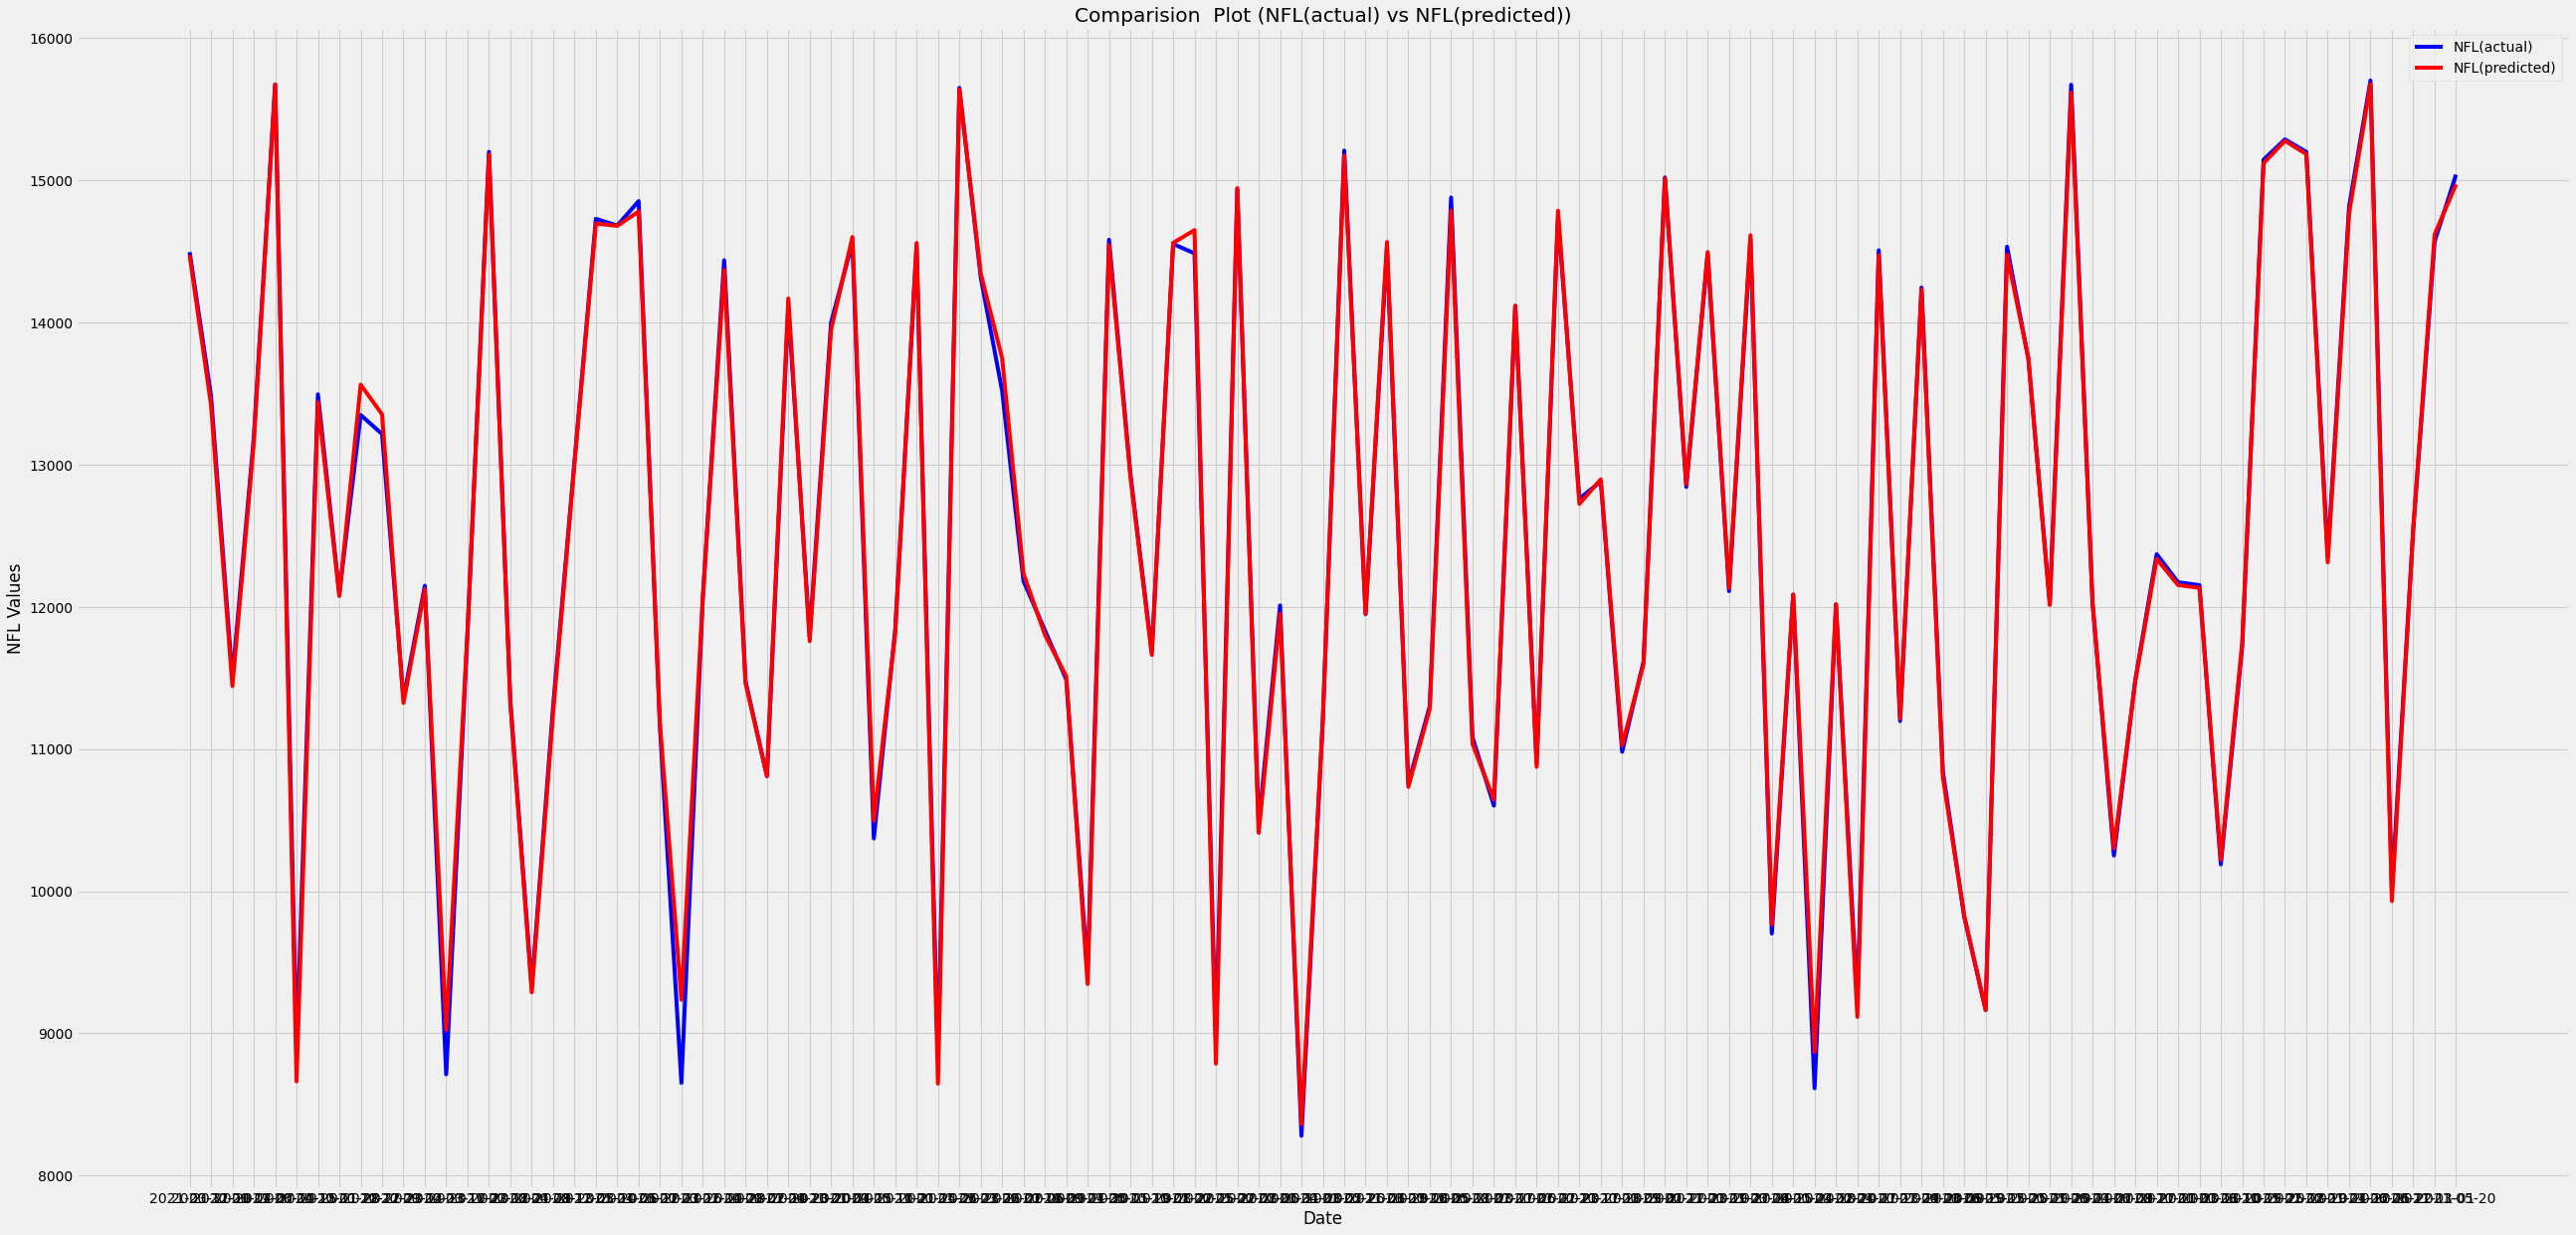

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test1,label='NFL(actual)',color='blue')
plt.plot(date,y_pred1,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Values')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
col=['NFH(actual)','NFL(actual)','NFH(predicted)','NFL(predicted)']
fg=pd.DataFrame(columns = col)
dg=pd.read_csv('test.csv')
fg.iloc[:,0]=dg.iloc[:,20]
fg.iloc[:,1]=dg.iloc[:,21]
fg.iloc[:,2]=y_pred
fg.iloc[:,3]=y_pred1
fg['Amount of Deviation:NFH (actual vs prediction)']=abs(fg['NFH(actual)']-fg['NFH(predicted)']).astype(float)
fg['Amount of Deviation:NFL (actual vs prediction)']=abs(fg['NFL(actual)']-fg['NFL(predicted)']).astype(float)
display(fg)
fg.to_csv('Dependent model Analysis.csv')

NFH(actual)  ...  Amount of Deviation:NFL (actual vs prediction)
0    14723.471177  ...                                       20.804892
1    13584.216045  ...                                       65.411105
2    11600.126799  ...                                       54.426152
3    13306.215213  ...                                       37.131020
4    15866.081846  ...                                        0.220483
..            ...  ...                                             ...
102  15846.875708  ...                                       26.107915
103  10219.235630  ...                                       73.841244
104  12691.065800  ...                                        5.153341
105  14959.887977  ...                                       49.337812
106  15162.051273  ...                                       67.644183

[107 rows x 6 columns]

## **Independent model construction/implementation**

**The only difference between the above pipelining technique(dependent algorithm structure) and the independent model structure is that in pipelining technique for NFL prediction i assume that NFL depends on NFH and based on which training/prediction but here both the training/predictions of NFL/NFH would be done differently**

###**NFH training/prediction**

In [ ]:
train_data = TabularDataset('train.csv')
test_data = TabularDataset('test.csv')

Loaded data from: train.csv | Columns = 22 / 22 | Rows = 248 -> 248
Loaded data from: test.csv | Columns = 22 / 22 | Rows = 107 -> 107


In [ ]:
date=test_data['Date(IST)']

In [ ]:
train_data=train_data.drop(columns=['nfl','Unnamed: 0','Date(IST)'])
test_data=test_data.drop(columns=['nfl','Unnamed: 0','Date(IST)'])

In [ ]:
train_data

NFO           NFC     FIIB  ...  Shine       Vega           nfh
0    11959.809699  11947.295628  5323.21  ...  -0.18   4.910000  11987.042977
1    13239.231342  13182.785524  9863.79  ...  -0.11  -0.490000  13238.521877
2    12111.127969  12085.116368  4674.24  ...   0.07  -0.900000  12153.140869
3     9451.695206   9306.519316  4655.18  ...   1.02  -2.669998   9470.314980
4    13482.954905  13550.790582  5316.24  ...   0.07  -1.779999  13621.364186
..            ...           ...      ...  ...    ...        ...           ...
243  12043.724888  12035.767359  5797.32  ...  -0.08   1.000000  12105.766782
244  11182.665466  11212.110839  4892.69  ...  -0.15  -0.080000  11240.308078
245   9972.649848   9676.052350  8336.42  ...  -1.21 -17.639999  10036.172659
246  12104.586698  12049.187670  4806.74  ...   0.42  -0.450000  12116.936165
247  10409.016913  10382.386367  4220.40  ...   0.14   2.509998  10499.668023

[248 rows x 19 columns]

In [ ]:
test_data

NFO           NFC      FIIB  ...  Shine      Vega           nfh
0    14538.210165  14670.744112   7657.89  ...   0.29 -0.210001  14723.471177
1    13497.858862  13568.790119   7663.53  ...  -0.27  0.250000  13584.216045
2    11556.529502  11549.656416   4931.66  ...  -0.21 -2.849998  11600.126799
3    13240.276875  13278.293515   8796.14  ...   0.45  0.509998  13306.215213
4    15844.769418  15740.020665   7447.97  ...   0.70 -1.789999  15866.081846
..            ...           ...       ...  ...    ...       ...           ...
102  15781.799179  15763.679655   6766.31  ...  -0.08 -0.350000  15846.875708
103  10037.018848  10195.855497   5467.93  ...   0.96 -3.349998  10219.235630
104  12599.398392  12690.988077  14549.31  ...  -0.15 -1.349998  12691.065800
105  14882.220976  14670.319899   6674.54  ...   0.30 -4.600000  14959.887977
106  15076.552057  15088.488792   8149.80  ...   0.22 -1.510000  15162.051273

[107 rows x 19 columns]

In [ ]:
label_column='nfh'
print("Summary of variable: \n", train_data1[label_column].describe())

Summary of variable: 
 count      248.000000
mean     12378.004519
std       2193.166560
min       7819.610704
25%      10918.583187
50%      12034.850657
75%      14623.349952
max      15921.677431
Name: nfh, dtype: float64


In [ ]:
if ht=='None':
  hyperparameters=hyp()
  predictor = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data,time_limit=time_limits,hyperparameters=hyperparameters)
  performance = predictor.evaluate(test_data)
else:
  predictor = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data,time_limit=time_limits,hyperparameters=hyperparameters,hyperparameter_tune_kwargs=ht)
  performance = predictor.evaluate(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20210712_043701/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20210712_043701/"
AutoGluon Version:  0.2.0
Train Data Rows:    248
Train Data Columns: 18
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15921.6774310452, 7819.61070394115, 12378.00452, 2193.16656)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12451.54 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column value

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300building tree 14 of 300

building tree 15 of 300
building tree 16 of 300
building tree 17 of 300building tree 18 of 300

building tree 19 of 300
building tree 20 of 300
building tree 21 of 300building tree 22 of 300

building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300building tree 27 of 300

building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300building tree 32 of 300

building tree 33 of 300building tree 34 of 300
building tree 35 of 300

building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300building tree 42 of 300

b

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.3s


building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300building tree 238 of 300

building tree 239 of 300
building tree 240 of 300
building tree 241 of 300building tree 242 of 300

building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300building tree 250 of 300

building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300building tree 259 of 300

building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
Fitted model: ExtraTrees ...
	0.9971	 = Validation r2 score
	0.75s	 = Training runtime
	0.1s	 = Validation runtime
Hyperparameter tuning model: XGBoost ...
	Time limit exceeded
Fitted model: XGBoost/T0 ...
	0.9986	 = Validation r2 score
	0.34s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	0.9932	 = Validation r2 score
	2.28s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	0.9961	 = Validation r2 score
	0.54s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	0.9947	 = Validation r2 score
	3.74s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: XGBo

In [ ]:
results2 = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.999668       0.122141  4.165309                0.000478           0.784307            2       True         47
1           LinearModel   0.999385       0.008672  0.020205                0.008672           0.020205            1       True         40
2            XGBoost/T0   0.998593       0.002678  0.341417                0.002678           0.341417            1       True         32
3          LightGBM/T18   0.998038       0.002402  0.323488                0.002402           0.323488            1       True         20
4          RandomForest   0.997199       0.102315  0.652179                0.102315           0.652179            1       True         25
5            ExtraTrees   0.997105       0.102375  0.746114                0.102375           0.746114        

In [ ]:
predictor.leaderboard(test_data, silent=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


model  score_test  ...  can_infer  fit_order
0           LinearModel    0.999006  ...       True         40
1   WeightedEnsemble_L2    0.998997  ...       True         47
2            ExtraTrees    0.998676  ...       True         31
3          RandomForest    0.998324  ...       True         25
4            XGBoost/T6    0.998161  ...       True         38
5          LightGBM/T15    0.997965  ...       True         17
6            XGBoost/T0    0.997577  ...       True         32
7            XGBoost/T2    0.997534  ...       True         34
8            XGBoost/T4    0.997383  ...       True         36
9          LightGBM/T18    0.997358  ...       True         20
10         LightGBM/T16    0.997270  ...       True         18
11         LightGBM/T19    0.997123  ...       True         21
12         LightGBM/T13    0.997009  ...       True         15
13         LightGBM/T17    0.996867  ...       True         19
14           XGBoost/T1    0.996587  ...       True         33
15           XGBoost/T7    0.996370  ...       True         39
16           XGBoost/T3    0.996230  ...       True         35
17         LightGBM/T20    0.996154  ...       True         22
18         LightGBM/T11    0.995862  ...       True         13
19         LightGBM/T14    0.995396  ...       True         16
20          LightGBM/T0    0.995150  ...       True          2
21          LightGBM/T9    0.993704  ...       True         11
22          LightGBM/T1    0.993410  ...       True          3
23           XGBoost/T5    0.992840  ...       True         37
24          LightGBM/T7    0.991663  ...       True          9
25          CatBoost/T0    0.991400  ...       True         26
26          LightGBM/T4    0.991114  ...       True          6
27         LightGBM/T12    0.990682  ...       True         14
28         LightGBM/T21    0.990313  ...       True         23
29         LightGBM/T10    0.989114  ...       True         12
30          LightGBM/T5    0.987679  ...       True          7
31          LightGBM/T3    0.987254  ...       True          5
32         LightGBM/T22    0.986281  ...       True         24
33          LightGBM/T8    0.985250  ...       True         10
34    NeuralNetMXNet/T3    0.983284  ...       True         44
35          CatBoost/T4    0.974793  ...       True         30
36          CatBoost/T2    0.973894  ...       True         28
37          CatBoost/T1    0.973275  ...       True         27
38          CatBoost/T3    0.967470  ...       True         29
39          LightGBM/T2    0.966600  ...       True          4
40           KNeighbors    0.923811  ...       True          1
41          LightGBM/T6    0.797660  ...       True          8
42    NeuralNetMXNet/T0    0.591129  ...       True         41
43    NeuralNetMXNet/T4    0.433016  ...       True         45
44    NeuralNetMXNet/T1   -0.424096  ...       True         42
45    NeuralNetMXNet/T5   -0.500456  ...       True         46
46    NeuralNetMXNet/T2   -1.017795  ...       True         43

[47 rows x 12 columns]

In [ ]:
y_test=test_data['nfh']
test_data=test_data.drop(columns=['nfh'])
test_data

NFO           NFC      FIIB  ...    Flow  Shine      Vega
0    14538.210165  14670.744112   7657.89  ... -0.2185   0.29 -0.210001
1    13497.858862  13568.790119   7663.53  ...  0.3100  -0.27  0.250000
2    11556.529502  11549.656416   4931.66  ... -0.5001  -0.21 -2.849998
3    13240.276875  13278.293515   8796.14  ... -0.0500   0.45  0.509998
4    15844.769418  15740.020665   7447.97  ...  0.2100   0.70 -1.789999
..            ...           ...       ...  ...     ...    ...       ...
102  15781.799179  15763.679655   6766.31  ...  0.1500  -0.08 -0.350000
103  10037.018848  10195.855497   5467.93  ...  0.2453   0.96 -3.349998
104  12599.398392  12690.988077  14549.31  ...  0.0707  -0.15 -1.349998
105  14882.220976  14670.319899   6674.54  ... -0.3126   0.30 -4.600000
106  15076.552057  15088.488792   8149.80  ... -0.3586   0.22 -1.510000

[107 rows x 18 columns]

In [ ]:
y_pred = predictor.predict(test_data)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
Evaluation: r2 on test data: 0.9989970692332867
Evaluations on test data:
{
    "r2": 0.9989970692332867,
    "root_mean_squared_error": -62.17918700337355,
    "mean_squared_error": -3866.2512964004954,
    "mean_absolute_error": -36.35270144267918,
    "pearsonr": 0.9995058817413924,
    "median_absolute_error": -23.831777961899206
}


In [ ]:
y_test

0      14723.471177
1      13584.216045
2      11600.126799
3      13306.215213
4      15866.081846
           ...     
102    15846.875708
103    10219.235630
104    12691.065800
105    14959.887977
106    15162.051273
Name: nfh, Length: 107, dtype: float64

In [ ]:
y_pred

0      14689.447266
1      13591.344727
2      11637.975586
3      13317.303711
4      15829.399414
           ...     
102    15819.864258
103    10199.727539
104    12770.988281
105    14836.698242
106    15153.959961
Name: nfh, Length: 107, dtype: float32

In [ ]:
disp(y_test,y_pred)

The actual value of NFH is 14723.471176958, the predicted value of NFH for the same is 14689.447265625
The actual value of NFH is 13584.2160450097, the predicted value of NFH for the same is 13591.3447265625
The actual value of NFH is 11600.126799126001, the predicted value of NFH for the same is 11637.9755859375
The actual value of NFH is 13306.2152128452, the predicted value of NFH for the same is 13317.3037109375
The actual value of NFH is 15866.0818455306, the predicted value of NFH for the same is 15829.3994140625
The actual value of NFH is 9154.9063319648, the predicted value of NFH for the same is 9134.576171875
The actual value of NFH is 13591.420663938501, the predicted value of NFH for the same is 13617.375
The actual value of NFH is 12213.2704411671, the predicted value of NFH for the same is 12244.0654296875
The actual value of NFH is 13840.2860395541, the predicted value of NFH for the same is 13762.7392578125
The actual value of NFH is 13630.236725513501, the predicted va

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


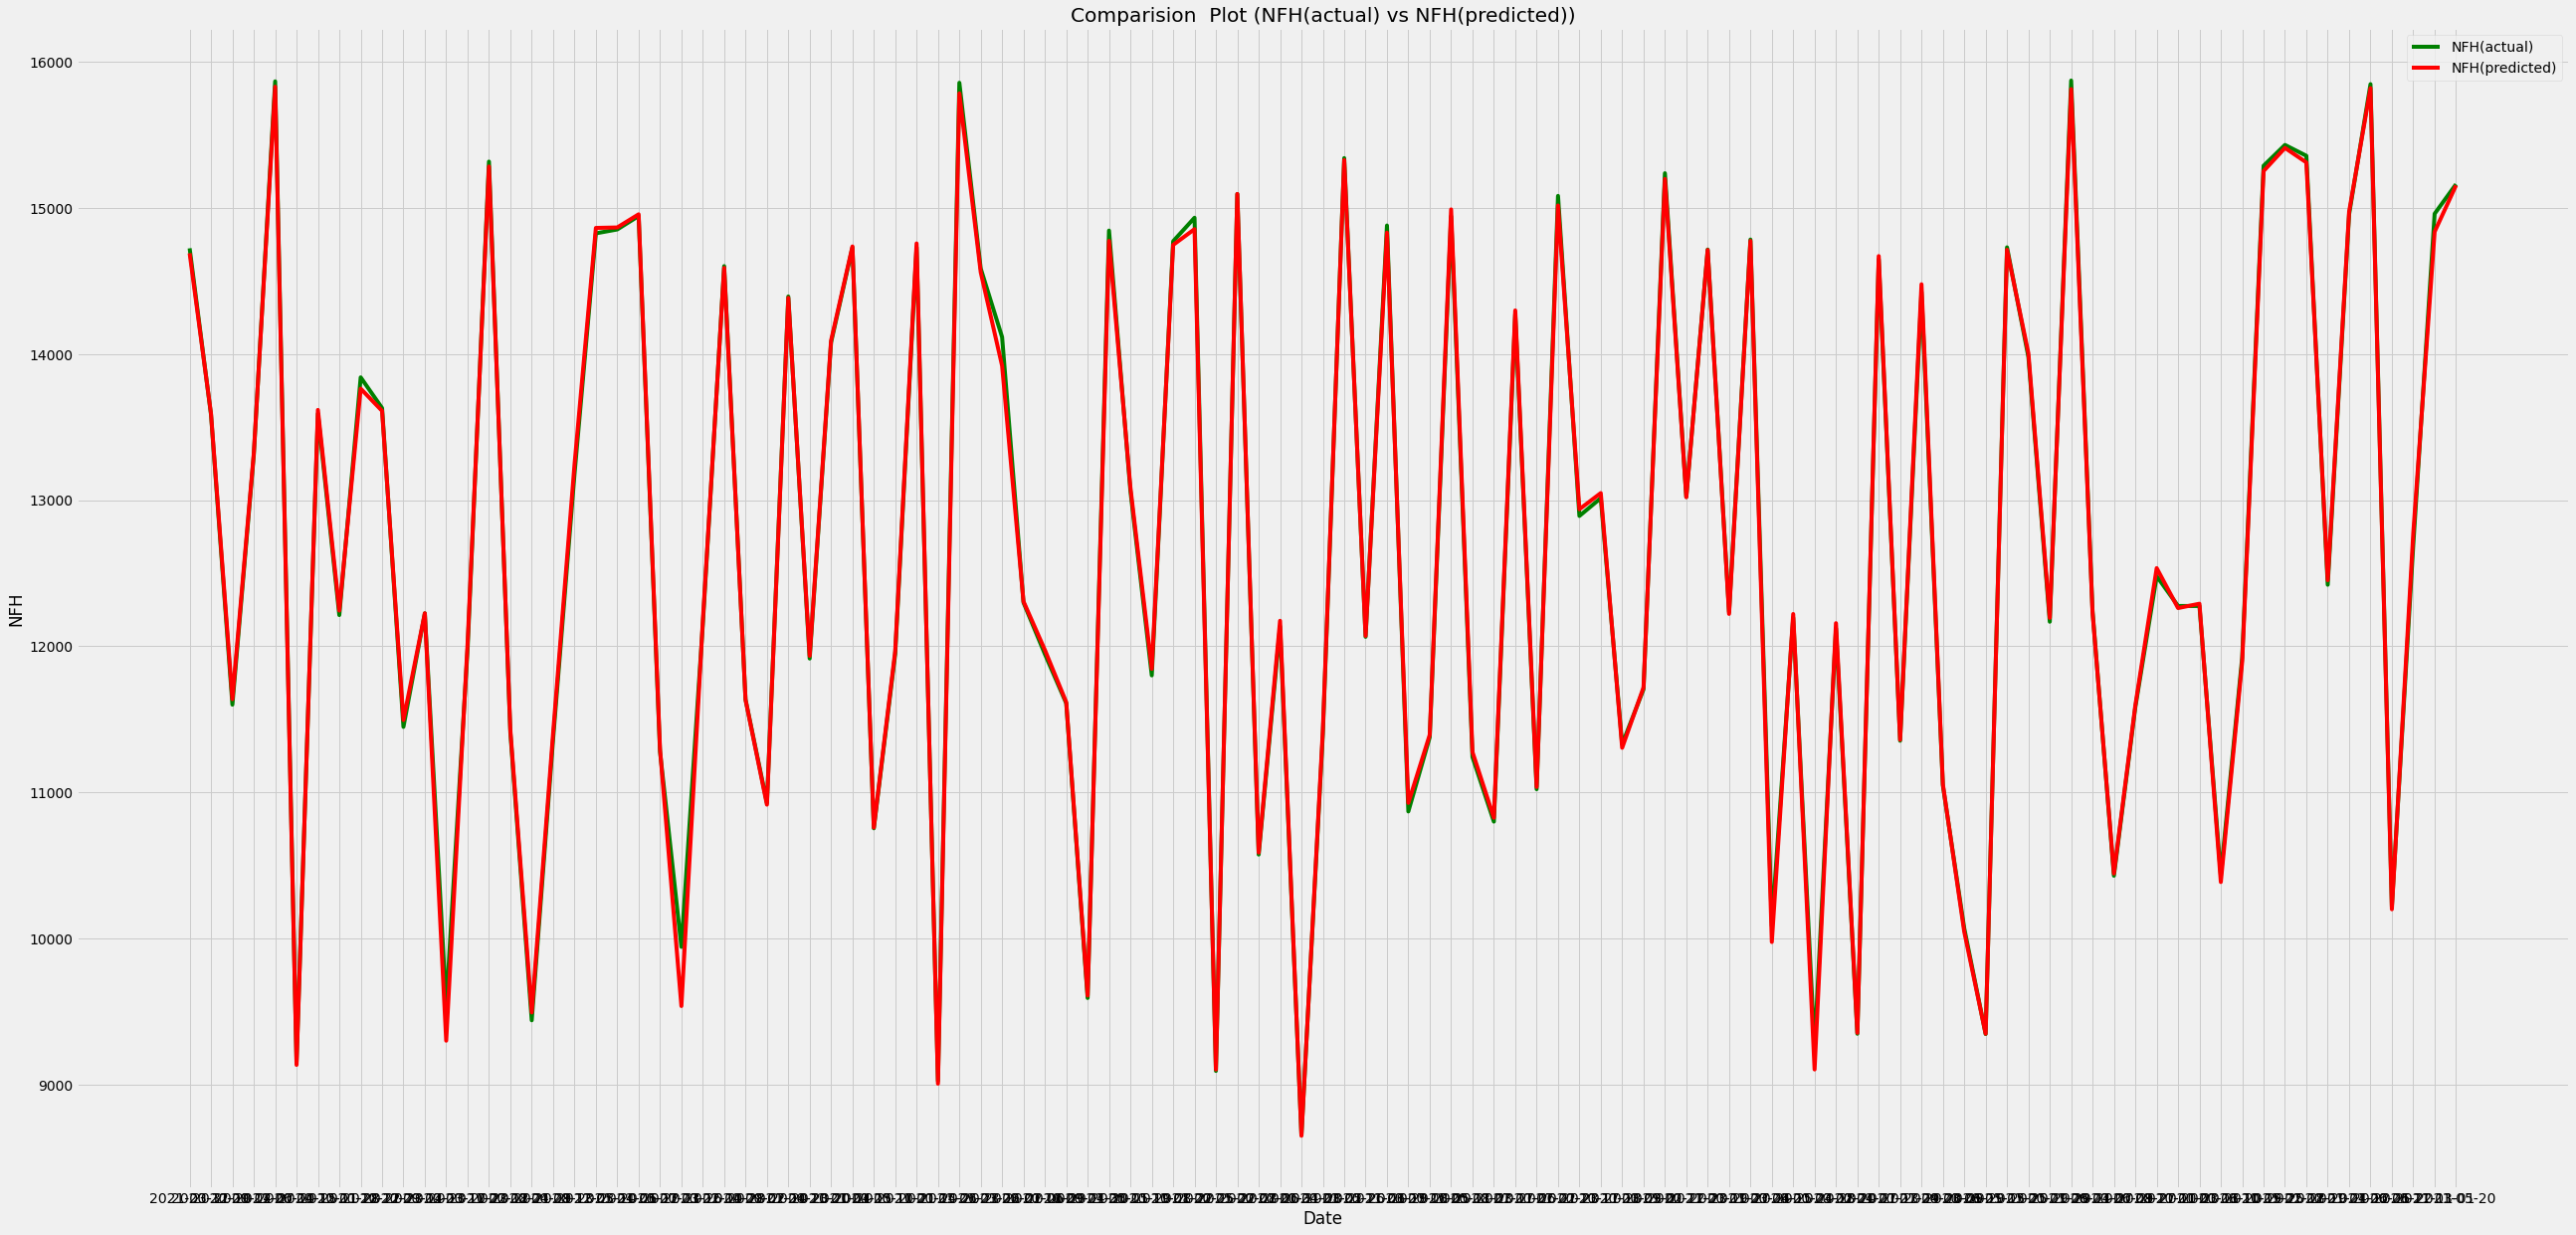

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,y_pred,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


### **NFL training/prediction**

In [ ]:
train_data1 = TabularDataset('train.csv')
test_data1 = TabularDataset('test.csv')

Loaded data from: train.csv | Columns = 22 / 22 | Rows = 248 -> 248
Loaded data from: test.csv | Columns = 22 / 22 | Rows = 107 -> 107


In [ ]:
train_data1=train_data1.drop(columns=['Unnamed: 0','Date(IST)','nfh'])
test_data1=test_data1.drop(columns=['Unnamed: 0','Date(IST)','nfh'])

In [ ]:
train_data1

NFO           NFC     FIIB  ...  Shine       Vega           nfl
0    11959.809699  11947.295628  5323.21  ...  -0.18   4.910000  11901.337254
1    13239.231342  13182.785524  9863.79  ...  -0.11  -0.490000  13120.329178
2    12111.127969  12085.116368  4674.24  ...   0.07  -0.900000  12060.059894
3     9451.695206   9306.519316  4655.18  ...   1.02  -2.669998   9248.908768
4    13482.954905  13550.790582  5316.24  ...   0.07  -1.779999  13332.485892
..            ...           ...      ...  ...    ...        ...           ...
243  12043.724888  12035.767359  5797.32  ...  -0.08   1.000000  11961.101557
244  11182.665466  11212.110839  4892.69  ...  -0.15  -0.080000  11139.494824
245   9972.649848   9676.052350  8336.42  ...  -1.21 -17.639999   9569.994728
246  12104.586698  12049.187670  4806.74  ...   0.42  -0.450000  11988.215908
247  10409.016913  10382.386367  4220.40  ...   0.14   2.509998  10314.290855

[248 rows x 19 columns]

In [ ]:
test_data1

NFO           NFC      FIIB  ...  Shine      Vega           nfl
0    14538.210165  14670.744112   7657.89  ...   0.29 -0.210001  14495.578329
1    13497.858862  13568.790119   7663.53  ...  -0.27  0.250000  13485.367160
2    11556.529502  11549.656416   4931.66  ...  -0.21 -2.849998  11497.328496
3    13240.276875  13278.293515   8796.14  ...   0.45  0.509998  13189.522621
4    15844.769418  15740.020665   7447.97  ...   0.70 -1.789999  15675.292748
..            ...           ...       ...  ...    ...       ...           ...
102  15781.799179  15763.679655   6766.31  ...  -0.08 -0.350000  15703.024907
103  10037.018848  10195.855497   5467.93  ...   0.96 -3.349998  10004.574643
104  12599.398392  12690.988077  14549.31  ...  -0.15 -1.349998  12547.272440
105  14882.220976  14670.319899   6674.54  ...   0.30 -4.600000  14570.732500
106  15076.552057  15088.488792   8149.80  ...   0.22 -1.510000  15040.964495

[107 rows x 19 columns]

In [ ]:
label_column = 'nfl'
print("Summary of  variable: \n", train_data1[label_column].describe())

Summary of  variable: 
 count      248.000000
mean     12188.607816
std       2227.072115
min       7264.768634
25%      10769.707605
50%      11891.391097
75%      14421.116604
max      15814.822034
Name: nfl, dtype: float64


In [ ]:
if ht=='None':
  hyperparameters=hyp()
  predictor1 = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data1,time_limit=time_limits,hyperparameters=hyperparameters)
  performance1 = predictor1.evaluate(test_data1)
else:
  predictor1 = TabularPredictor(label=label_column, eval_metric=metric).fit(train_data1,time_limit=time_limits,hyperparameters=hyperparameters,hyperparameter_tune_kwargs=ht)
  performance1 = predictor1.evaluate(test_data1)

No path specified. Models will be saved in: "AutogluonModels/ag-20210712_043807/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20210712_043807/"
AutoGluon Version:  0.2.0
Train Data Rows:    248
Train Data Columns: 18
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15814.8220341054, 7264.76863366667, 12188.60782, 2227.07211)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12443.65 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column value

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300building tree 7 of 300

building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300building tree 16 of 300

building tree 17 of 300building tree 18 of 300

building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300building tree 24 of 300

building tree 25 of 300building tree 26 of 300

building tree 27 of 300building tree 28 of 300

building tree 29 of 300
building tree 30 of 300
building tree 31 of 300building tree 32 of 300

building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.3s


building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300building tree 230 of 300

building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300building tree 237 of 300

building tree 238 of 300building tree 239 of 300

building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300building tree 244 of 300

building tree 245 of 300
building tree 246 of 300
building tree 247 of 300building tree 248 of 300

building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300building tree 263 of 300



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
Fitted model: ExtraTrees ...
	0.9969	 = Validation r2 score
	0.75s	 = Training runtime
	0.1s	 = Validation runtime
Hyperparameter tuning model: XGBoost ...
	Time limit exceeded
Fitted model: XGBoost/T0 ...
	0.9989	 = Validation r2 score
	0.4s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	0.9926	 = Validation r2 score
	0.59s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	0.9941	 = Validation r2 score
	0.45s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	0.9982	 = Validation r2 score
	1.55s	 = Training runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost

In [ ]:
results3 = predictor1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.999497       0.120662  3.305727                0.000486           0.764310            2       True         50
1           LinearModel   0.999365       0.008672  0.021905                0.008672           0.021905            1       True         42
2            XGBoost/T5   0.999200       0.006433  2.514319                0.006433           2.514319            1       True         37
3            XGBoost/T0   0.998872       0.002779  0.396519                0.002779           0.396519            1       True         32
4            XGBoost/T3   0.998235       0.003979  1.549798                0.003979           1.549798            1       True         35
5            XGBoost/T4   0.997922       0.003413  0.770486                0.003413           0.770486        

In [ ]:
predictor1.leaderboard(test_data1, silent=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


model  score_test  ...  can_infer  fit_order
0            ExtraTrees    0.998133  ...       True         31
1   WeightedEnsemble_L2    0.998001  ...       True         50
2           LinearModel    0.997829  ...       True         42
3            XGBoost/T9    0.997694  ...       True         41
4            XGBoost/T5    0.997523  ...       True         37
5            XGBoost/T6    0.997308  ...       True         38
6          RandomForest    0.997285  ...       True         25
7          LightGBM/T12    0.997202  ...       True         14
8            XGBoost/T7    0.996773  ...       True         39
9            XGBoost/T4    0.996566  ...       True         36
10         LightGBM/T11    0.996528  ...       True         13
11           XGBoost/T3    0.996499  ...       True         35
12          LightGBM/T7    0.996458  ...       True          9
13           XGBoost/T8    0.996405  ...       True         40
14         LightGBM/T22    0.996318  ...       True         24
15         LightGBM/T19    0.996318  ...       True         21
16         LightGBM/T10    0.996303  ...       True         12
17         LightGBM/T13    0.996145  ...       True         15
18          LightGBM/T9    0.996106  ...       True         11
19          LightGBM/T6    0.996035  ...       True          8
20         LightGBM/T18    0.995987  ...       True         20
21           XGBoost/T0    0.995891  ...       True         32
22         LightGBM/T20    0.995878  ...       True         22
23         LightGBM/T14    0.995772  ...       True         16
24          LightGBM/T0    0.995755  ...       True          2
25           XGBoost/T1    0.995470  ...       True         33
26         LightGBM/T16    0.995317  ...       True         18
27           XGBoost/T2    0.994505  ...       True         34
28          LightGBM/T8    0.994462  ...       True         10
29          LightGBM/T4    0.994188  ...       True          6
30         LightGBM/T17    0.993299  ...       True         19
31          LightGBM/T1    0.993237  ...       True          3
32          CatBoost/T0    0.990282  ...       True         26
33          LightGBM/T3    0.989290  ...       True          5
34          LightGBM/T5    0.989232  ...       True          7
35         LightGBM/T15    0.987276  ...       True         17
36          CatBoost/T3    0.973641  ...       True         29
37          CatBoost/T1    0.967960  ...       True         27
38          CatBoost/T2    0.958067  ...       True         28
39          CatBoost/T4    0.937007  ...       True         30
40           KNeighbors    0.924016  ...       True          1
41          LightGBM/T2    0.914078  ...       True          4
42         LightGBM/T21    0.632512  ...       True         23
43    NeuralNetMXNet/T4    0.624563  ...       True         47
44    NeuralNetMXNet/T0    0.588145  ...       True         43
45    NeuralNetMXNet/T2    0.259069  ...       True         45
46    NeuralNetMXNet/T6    0.220026  ...       True         49
47    NeuralNetMXNet/T5    0.031209  ...       True         48
48    NeuralNetMXNet/T1   -0.230429  ...       True         44
49    NeuralNetMXNet/T3   -0.462546  ...       True         46

[50 rows x 12 columns]

In [ ]:
y_test1=test_data1['nfl']
test_data1=test_data1.drop(columns=['nfl'])
test_data1

NFO           NFC      FIIB  ...    Flow  Shine      Vega
0    14538.210165  14670.744112   7657.89  ... -0.2185   0.29 -0.210001
1    13497.858862  13568.790119   7663.53  ...  0.3100  -0.27  0.250000
2    11556.529502  11549.656416   4931.66  ... -0.5001  -0.21 -2.849998
3    13240.276875  13278.293515   8796.14  ... -0.0500   0.45  0.509998
4    15844.769418  15740.020665   7447.97  ...  0.2100   0.70 -1.789999
..            ...           ...       ...  ...     ...    ...       ...
102  15781.799179  15763.679655   6766.31  ...  0.1500  -0.08 -0.350000
103  10037.018848  10195.855497   5467.93  ...  0.2453   0.96 -3.349998
104  12599.398392  12690.988077  14549.31  ...  0.0707  -0.15 -1.349998
105  14882.220976  14670.319899   6674.54  ... -0.3126   0.30 -4.600000
106  15076.552057  15088.488792   8149.80  ... -0.3586   0.22 -1.510000

[107 rows x 18 columns]

In [ ]:
y_pred2 = predictor1.predict(test_data1)
perf1 = predictor1.evaluate_predictions(y_true=y_test1, y_pred=y_pred2, auxiliary_metrics=True)

Evaluation: r2 on test data: 0.9980008772330313
Evaluations on test data:
{
    "r2": 0.9980008772330313,
    "root_mean_squared_error": -89.12735008009311,
    "mean_squared_error": -7943.684532299479,
    "mean_absolute_error": -49.41278717792866,
    "pearsonr": 0.9990218837731004,
    "median_absolute_error": -32.14513686290047
}


In [ ]:
y_test1

0      14495.578329
1      13485.367160
2      11497.328496
3      13189.522621
4      15675.292748
           ...     
102    15703.024907
103    10004.574643
104    12547.272440
105    14570.732500
106    15040.964495
Name: nfl, Length: 107, dtype: float64

In [ ]:
y_pred2

0      14482.953125
1      13435.629883
2      11445.959961
3      13175.044922
4      15682.579102
           ...     
102    15673.667969
103     9963.789062
104    12506.854492
105    14632.957031
106    14976.182617
Name: nfl, Length: 107, dtype: float32

In [ ]:
disp1(y_test1,y_pred2)

The actual value of NFL is 14495.5783290224, the predicted value of NFL for the same is 14482.953125
The actual value of NFL is 13485.367160136202, the predicted value of NFL for the same is 13435.6298828125
The actual value of NFL is 11497.3284958669, the predicted value of NFL for the same is 11445.9599609375
The actual value of NFL is 13189.5226214304, the predicted value of NFL for the same is 13175.044921875
The actual value of NFL is 15675.292748223701, the predicted value of NFL for the same is 15682.5791015625
The actual value of NFL is 8871.18041524241, the predicted value of NFL for the same is 8741.0830078125
The actual value of NFL is 13495.794777456102, the predicted value of NFL for the same is 13459.5703125
The actual value of NFL is 12093.7312391231, the predicted value of NFL for the same is 12060.22265625
The actual value of NFL is 13349.9014106994, the predicted value of NFL for the same is 13581.744140625
The actual value of NFL is 13216.479142143, the predicted val

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


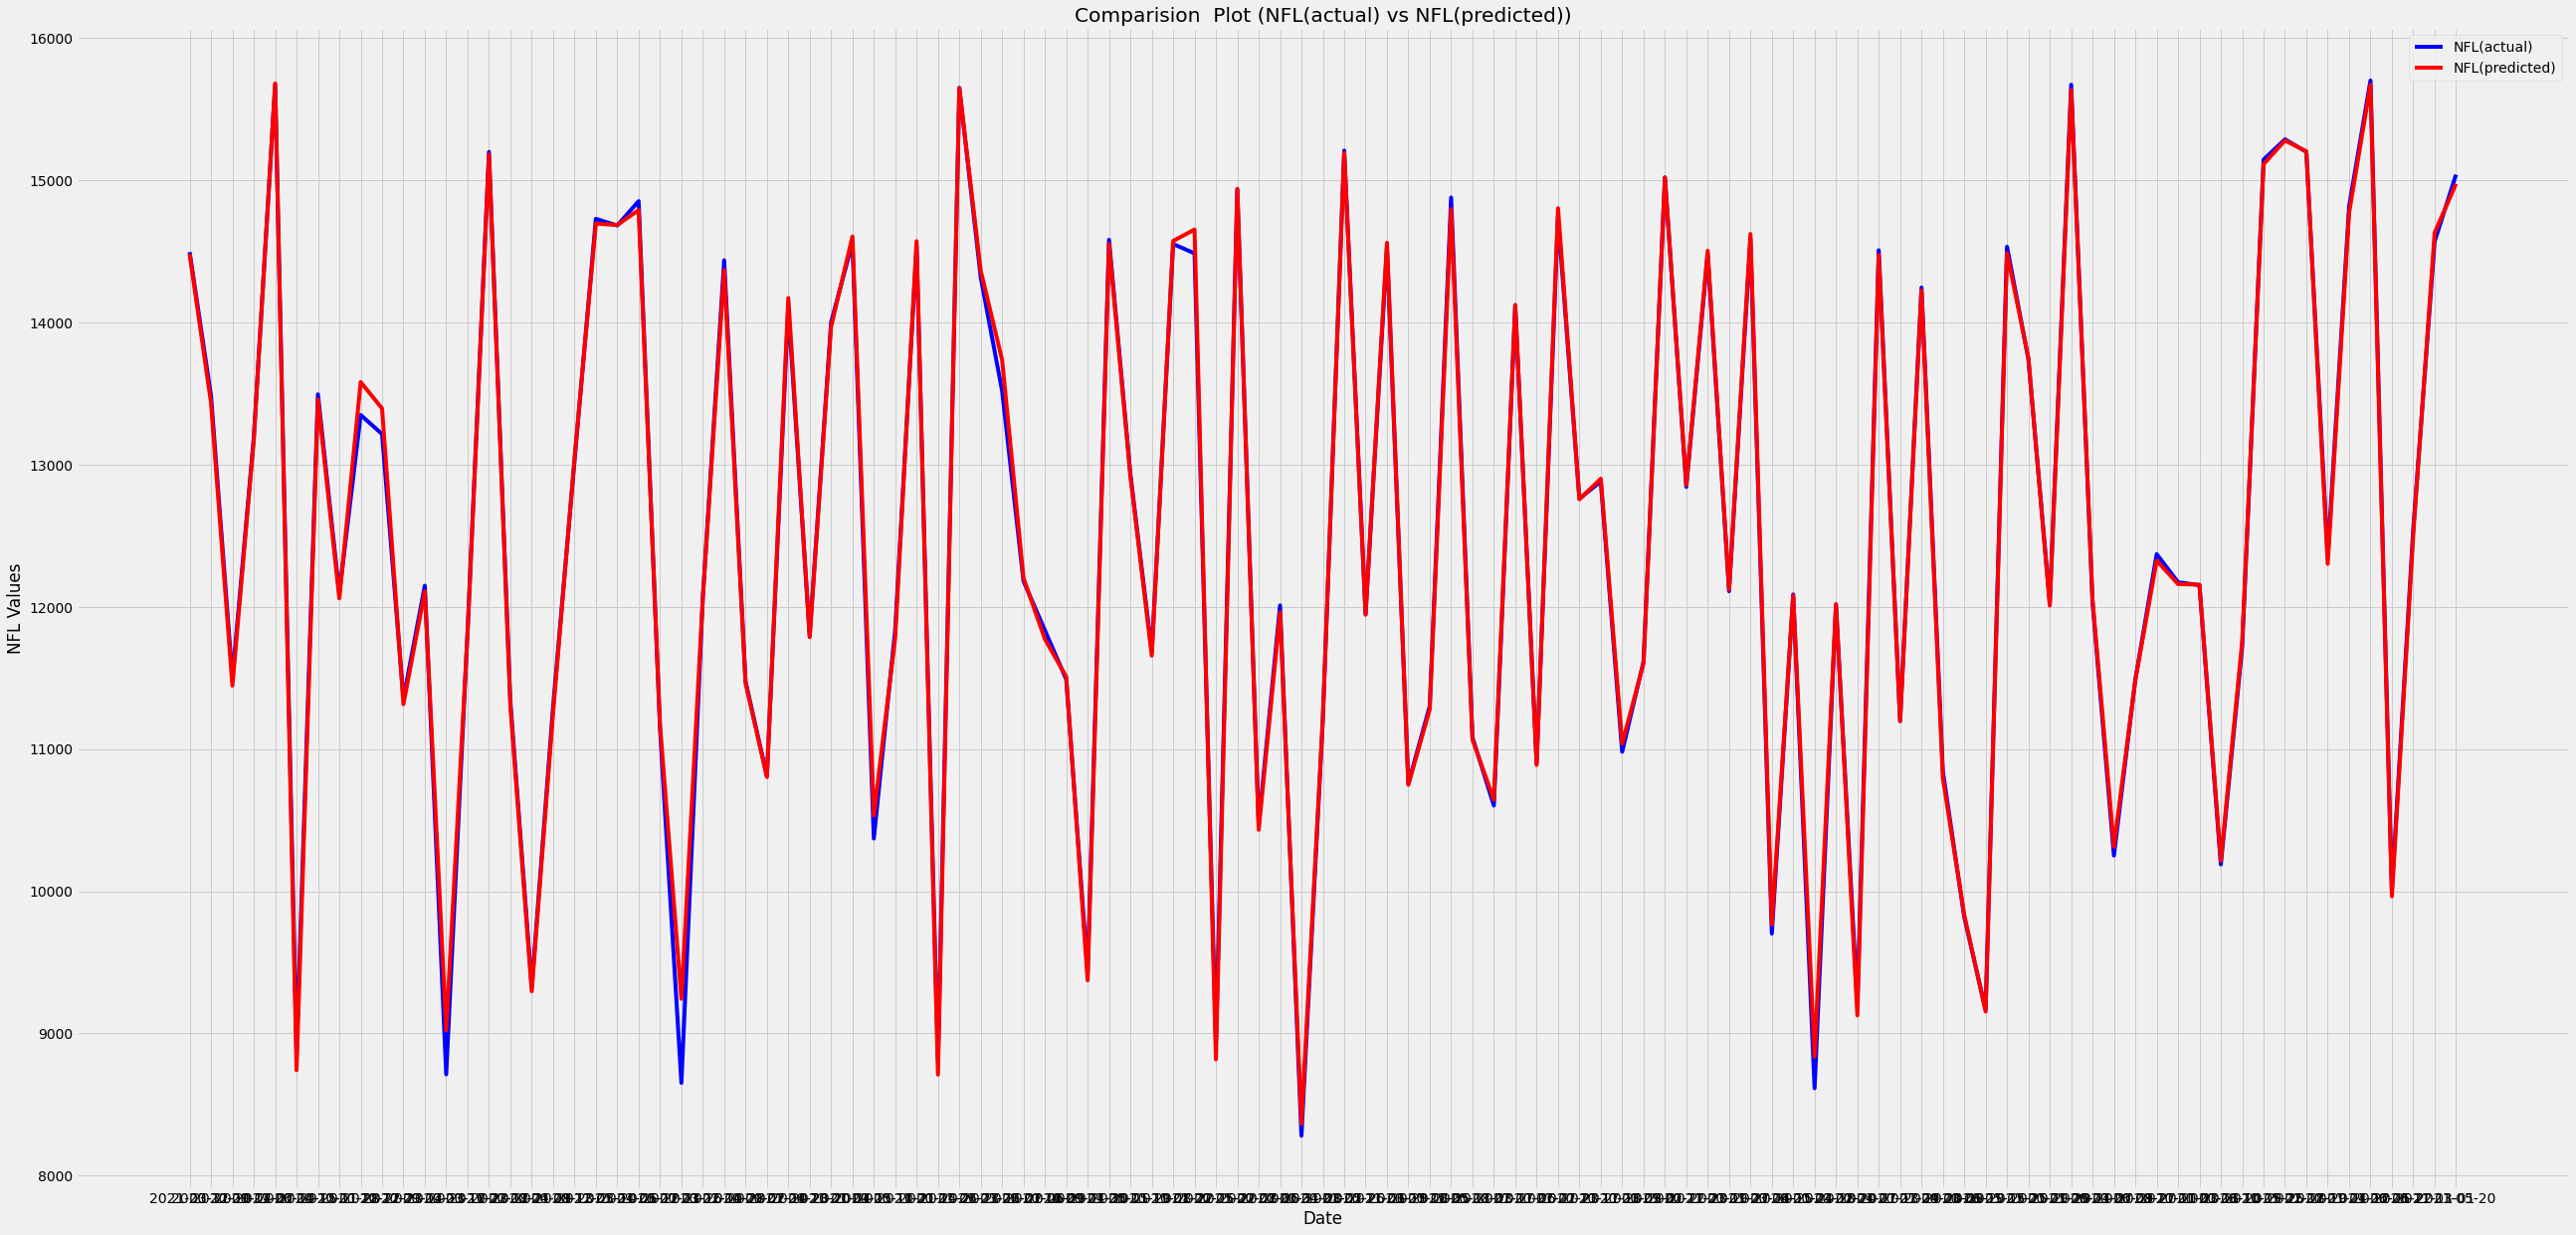

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test1,label='NFL(actual)',color='blue')
plt.plot(date,y_pred2,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Values')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
col=['NFH(actual)','NFL(actual)','NFH(predicted)','NFL(predicted)']
fg1=pd.DataFrame(columns = col)
dg=pd.read_csv('test.csv')
fg1.iloc[:,0]=dg.iloc[:,20]
fg1.iloc[:,1]=dg.iloc[:,21]
fg1.iloc[:,2]=y_pred
fg1.iloc[:,3]=y_pred2
fg1['Amount of Deviation:NFH (actual vs prediction)']=abs(fg1['NFH(actual)']-fg1['NFH(predicted)']).astype(float)
fg1['Amount of Deviation:NFL (actual vs prediction)']=abs(fg1['NFL(actual)']-fg1['NFL(predicted)']).astype(float)
fg1.to_csv('Independent model Analysis.csv')
display(fg1)

NFH(actual)  ...  Amount of Deviation:NFL (actual vs prediction)
0    14723.471177  ...                                       12.625204
1    13584.216045  ...                                       49.737277
2    11600.126799  ...                                       51.368535
3    13306.215213  ...                                       14.477700
4    15866.081846  ...                                        7.286353
..            ...  ...                                             ...
102  15846.875708  ...                                       29.356938
103  10219.235630  ...                                       40.785580
104  12691.065800  ...                                       40.417948
105  14959.887977  ...                                       62.224531
106  15162.051273  ...                                       64.781878

[107 rows x 6 columns]

### **Comparative Analysis between Dependent and Independent model algorithms**

In [ ]:
d=pd.read_csv('Dependent model Analysis.csv')
id=pd.read_csv('Independent model Analysis.csv')

**Graphical Analysis of NFH values**

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

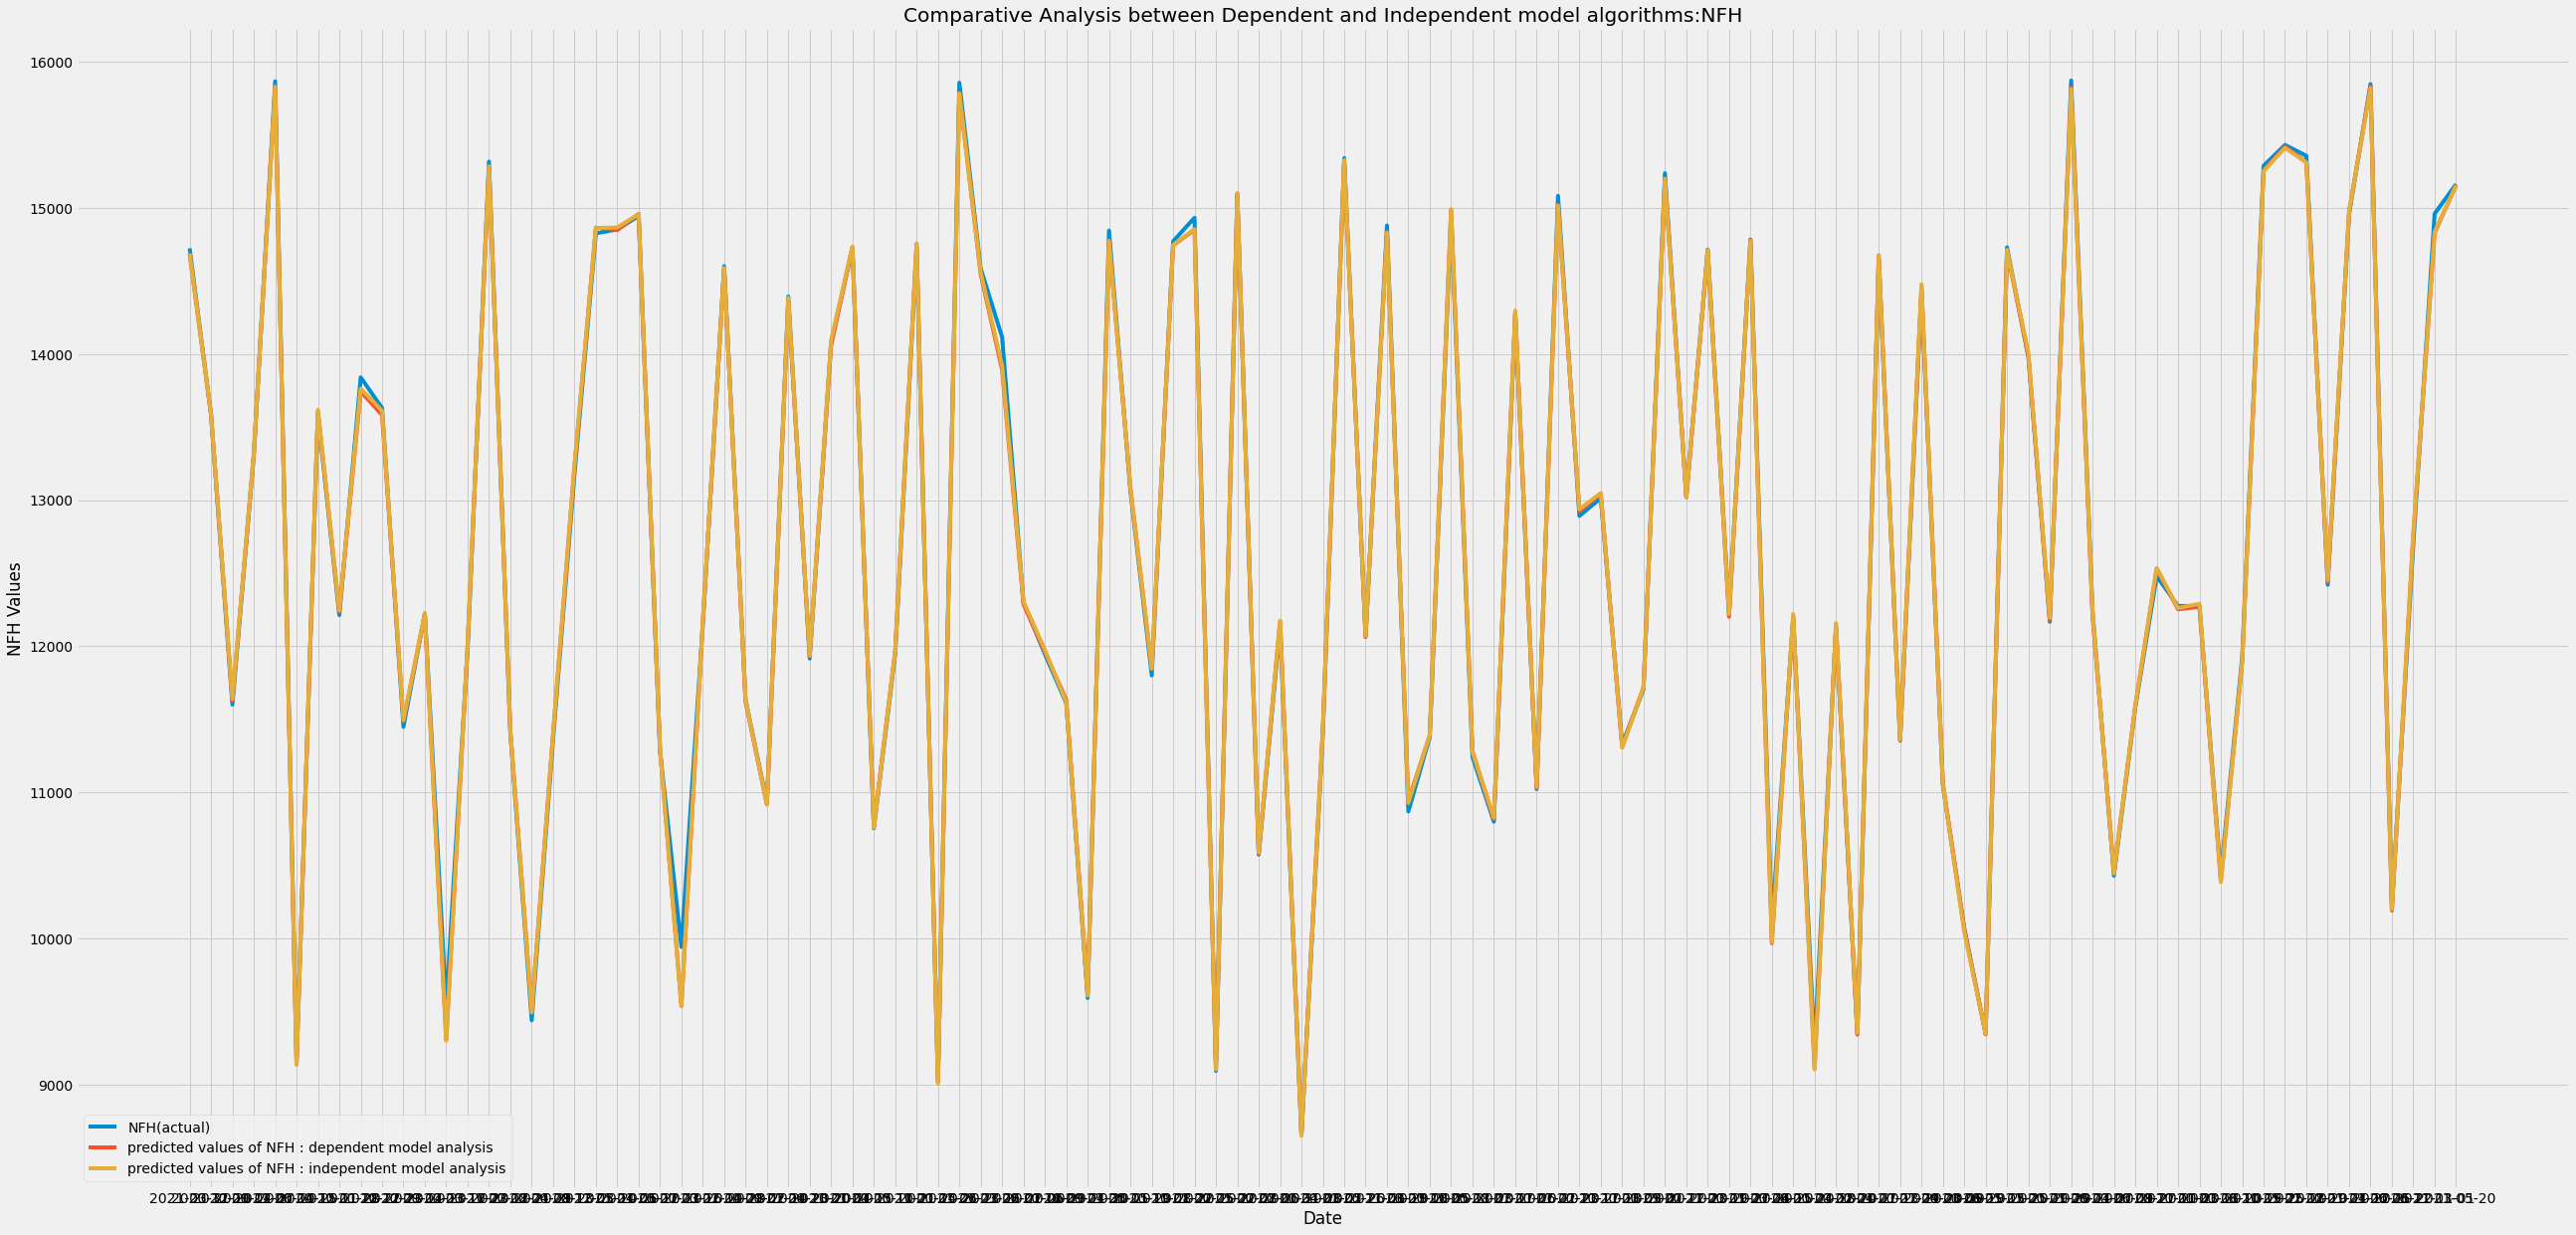

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,d['NFH(actual)'],label='NFH(actual)')
plt.plot(date,d['NFH(predicted)'],label='predicted values of NFH : dependent model analysis')
plt.plot(date,id['NFH(predicted)'],label='predicted values of NFH : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFH')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH Values')
plt.style.use('fivethirtyeight')
plt.show()

**Amount of Deviation between the actual values and the predicted values for both the models based on NFH**

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


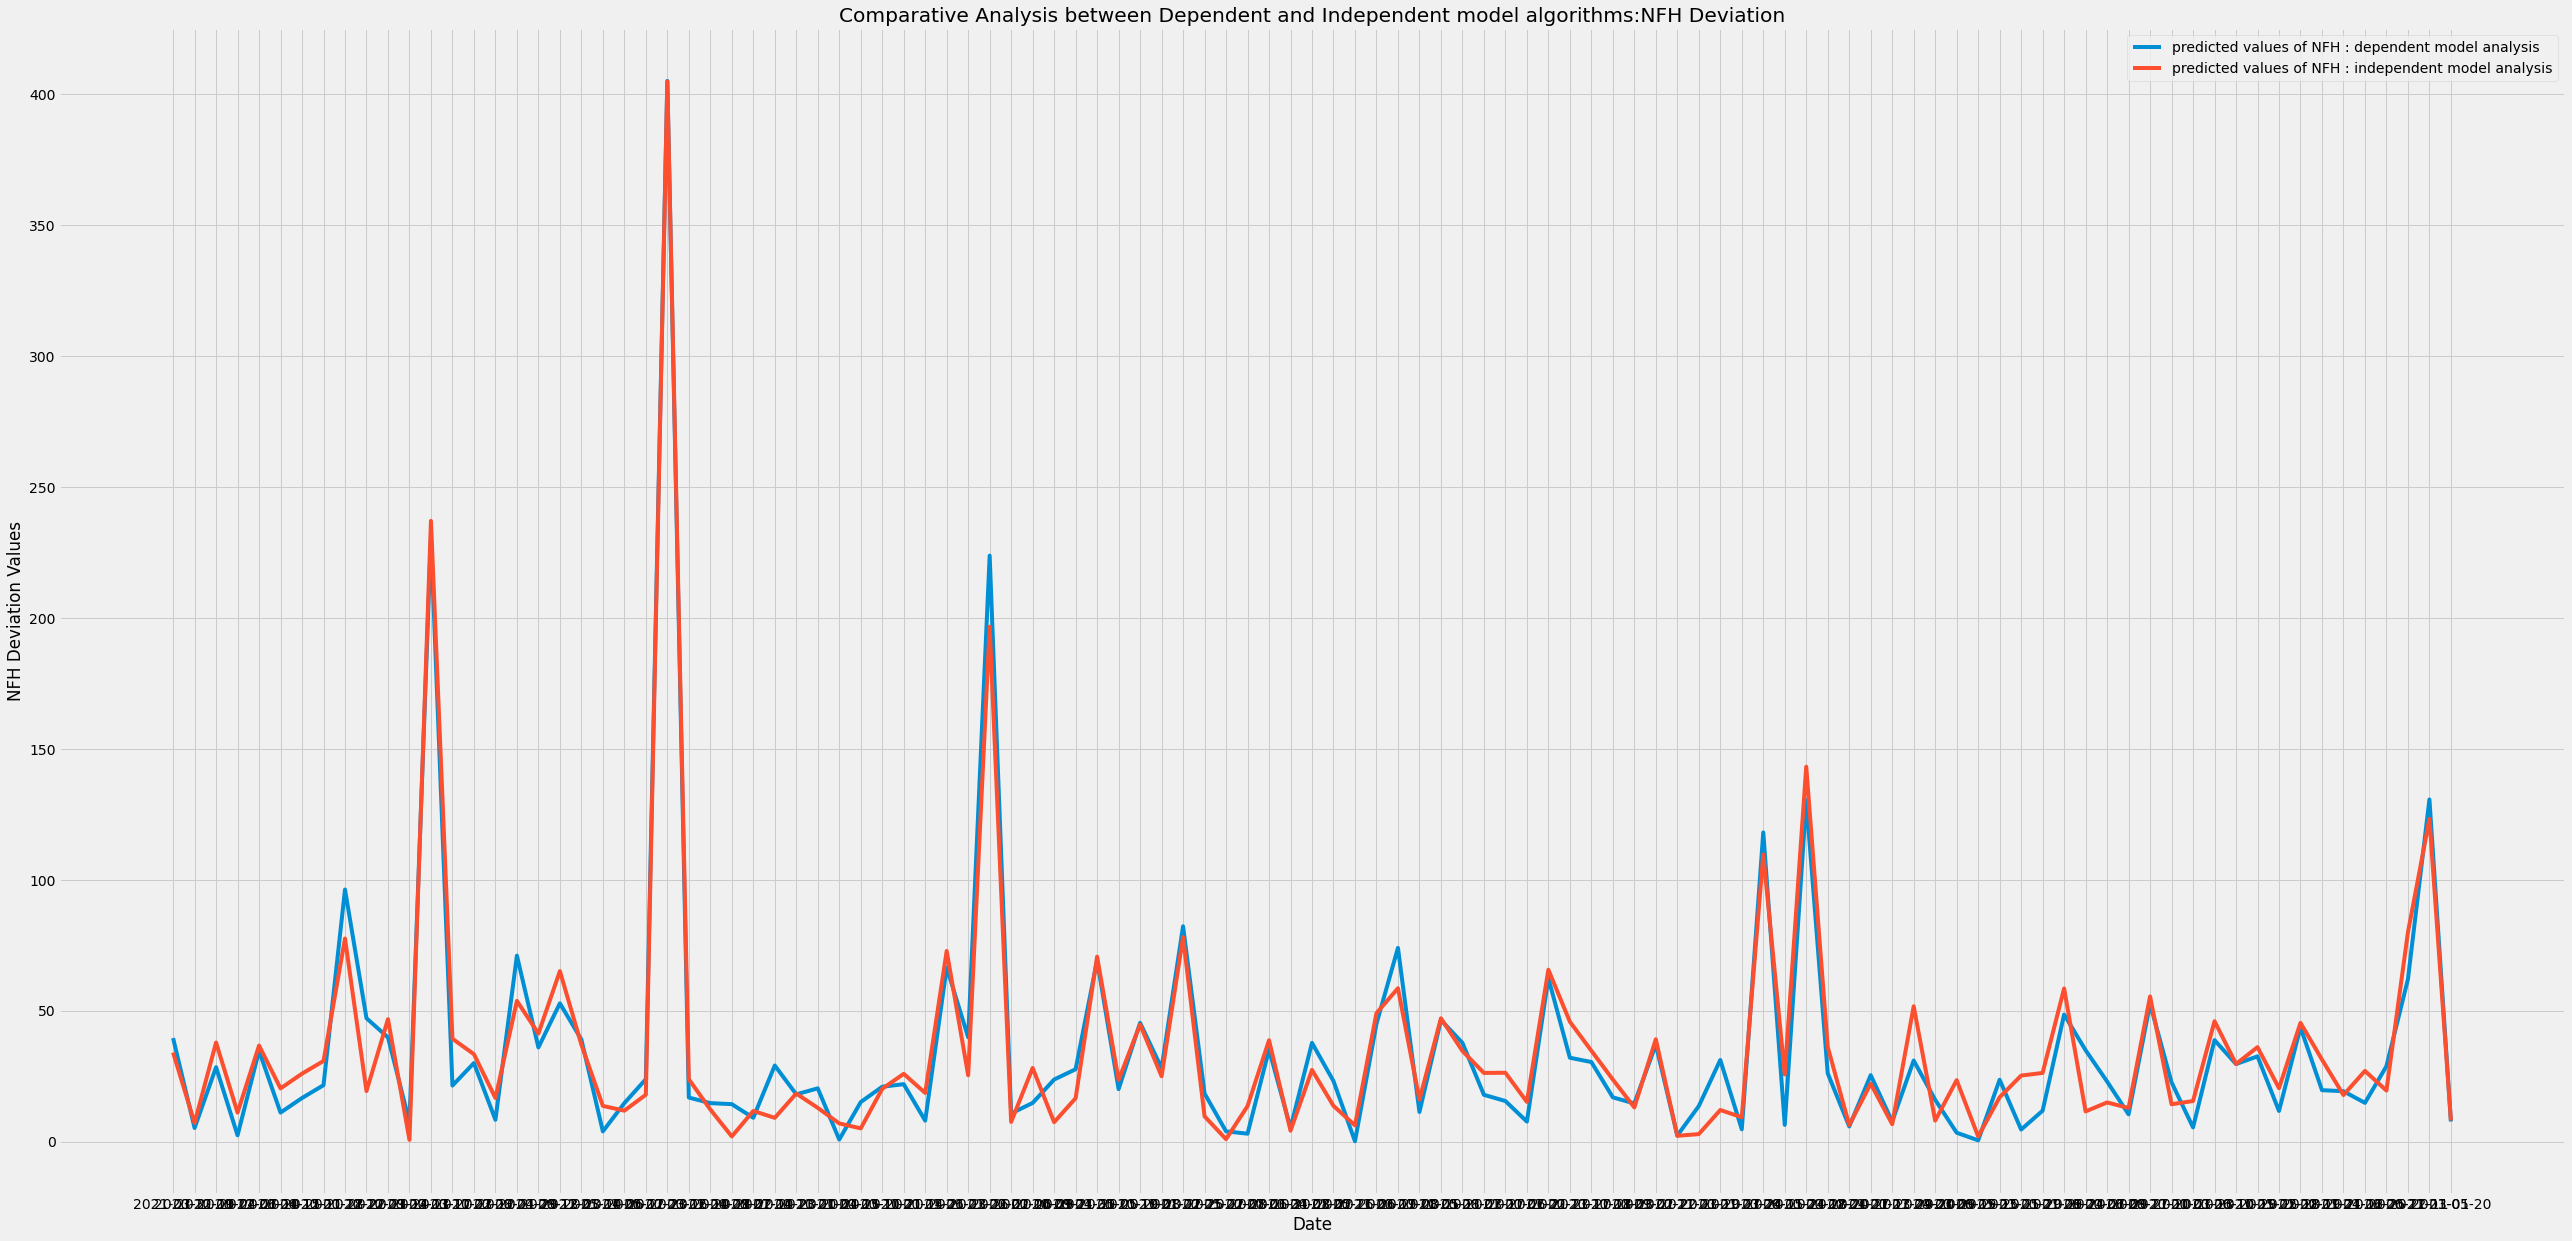

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,d['Amount of Deviation:NFH (actual vs prediction)'],label='predicted values of NFH : dependent model analysis')
plt.plot(date,id['Amount of Deviation:NFH (actual vs prediction)'],label='predicted values of NFH : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFH Deviation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH Deviation Values')
plt.style.use('fivethirtyeight')
plt.show()

**Graphical Analysis of NFL values**

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

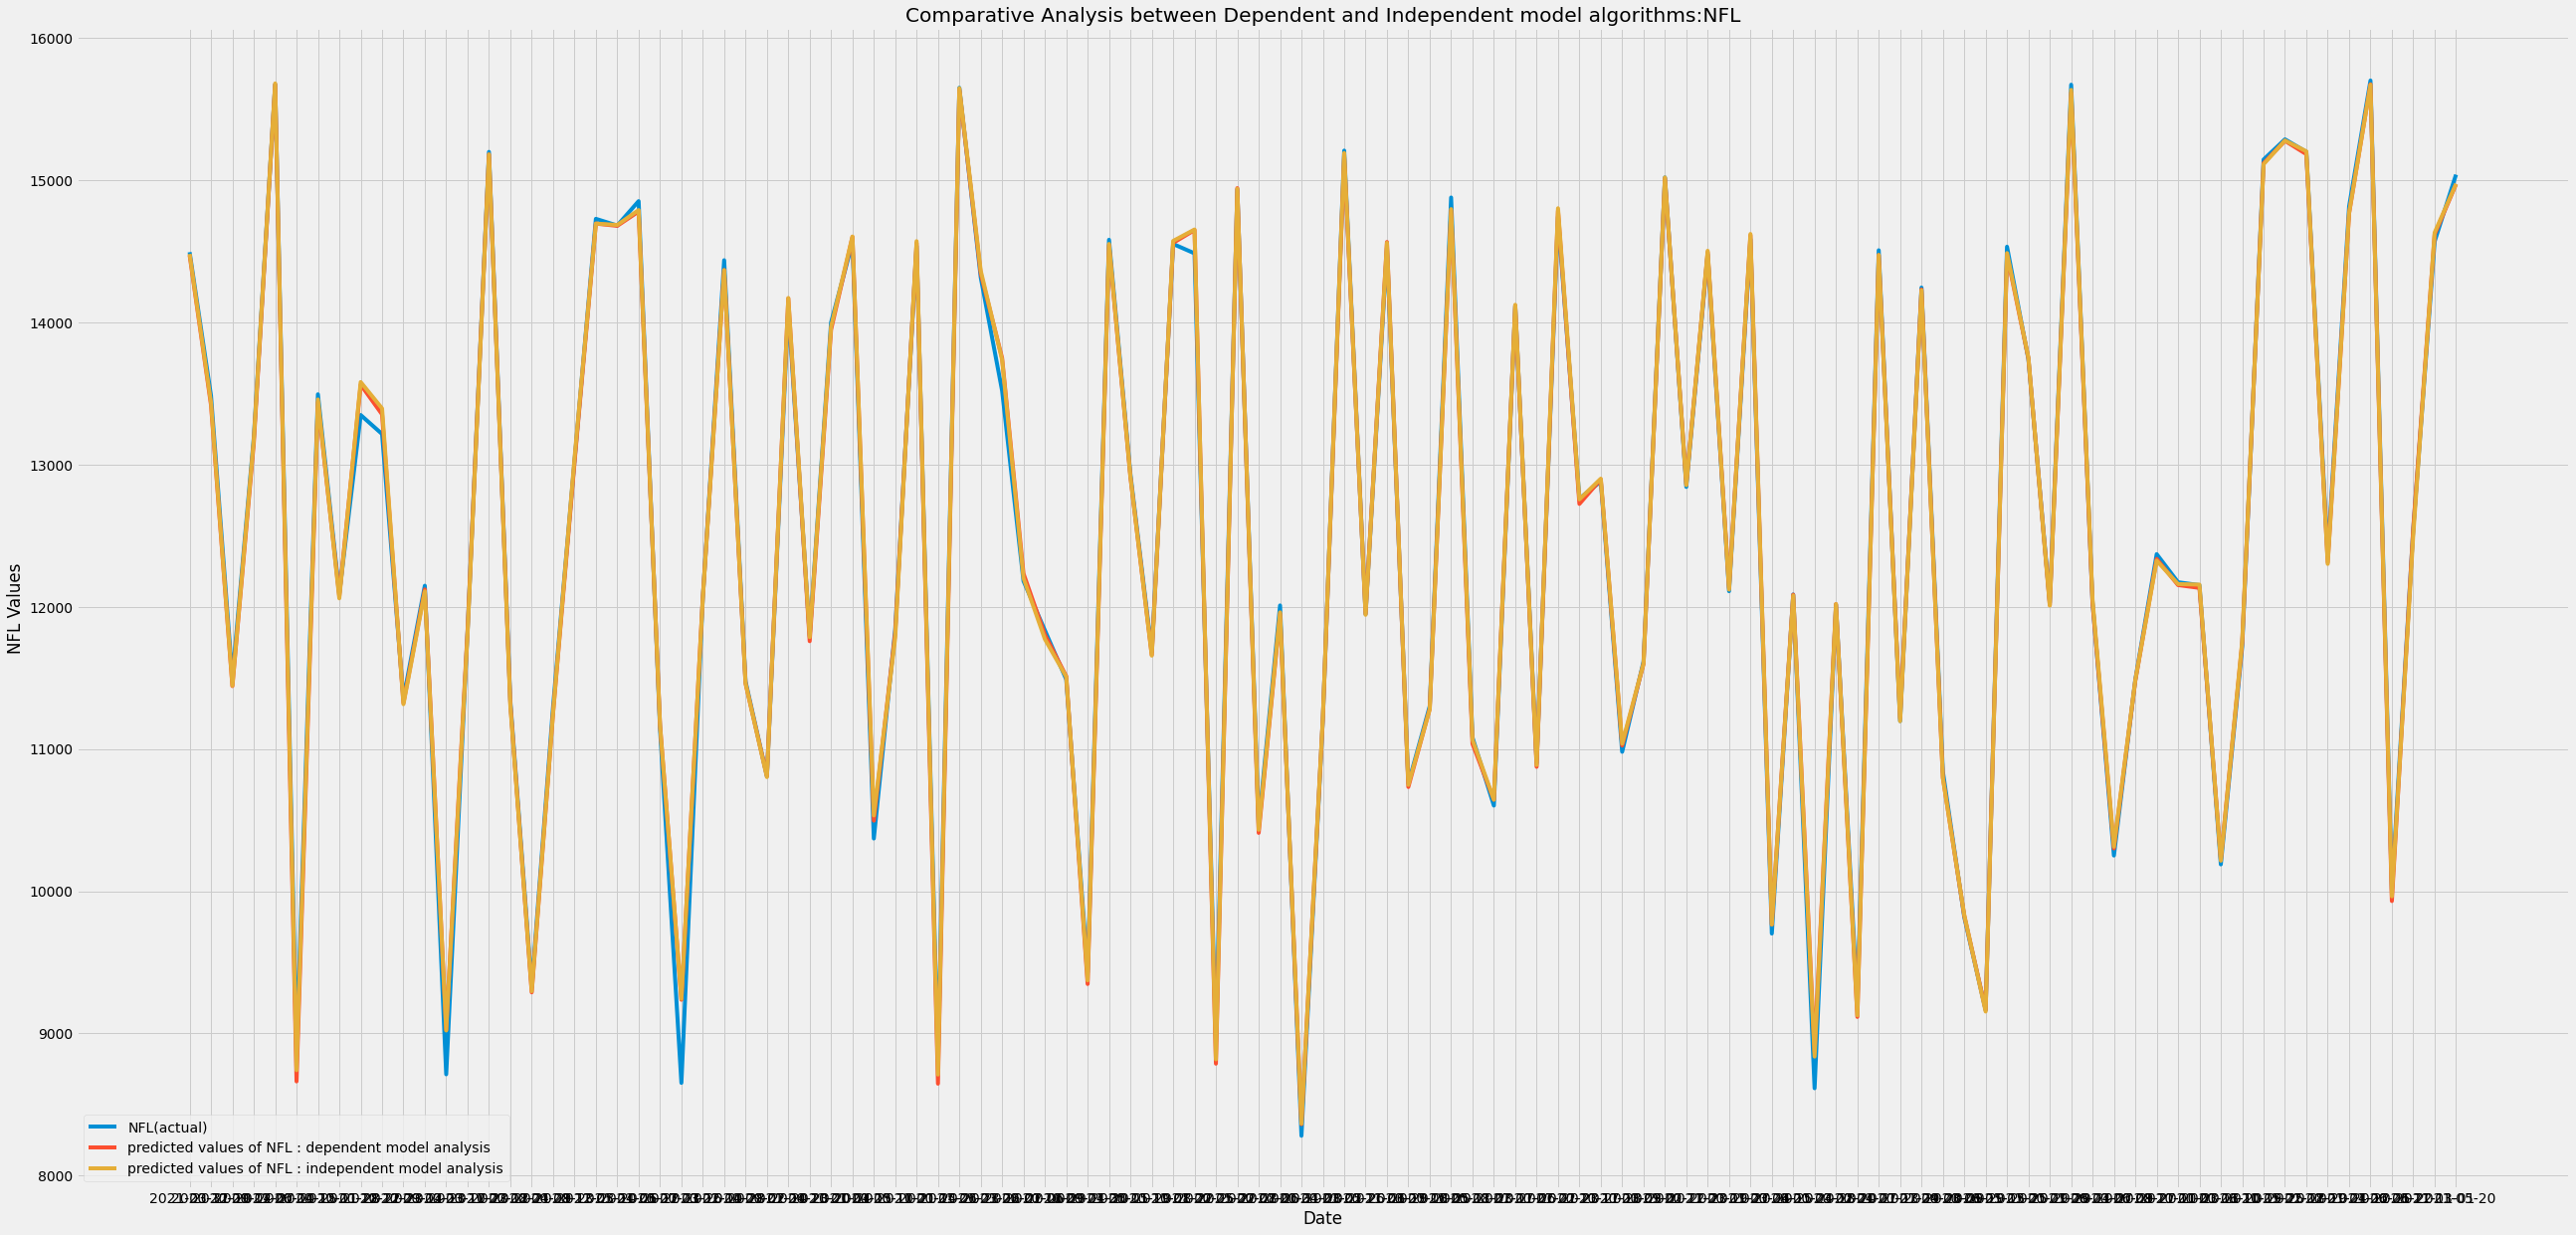

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,d['NFL(actual)'],label='NFL(actual)')
plt.plot(date,d['NFL(predicted)'],label='predicted values of NFL : dependent model analysis')
plt.plot(date,id['NFL(predicted)'],label='predicted values of NFL : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFL')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Values')
plt.style.use('fivethirtyeight')
plt.show()

**Amount of Deviation between the actual values and the predicted values for both the models based on NFL**

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


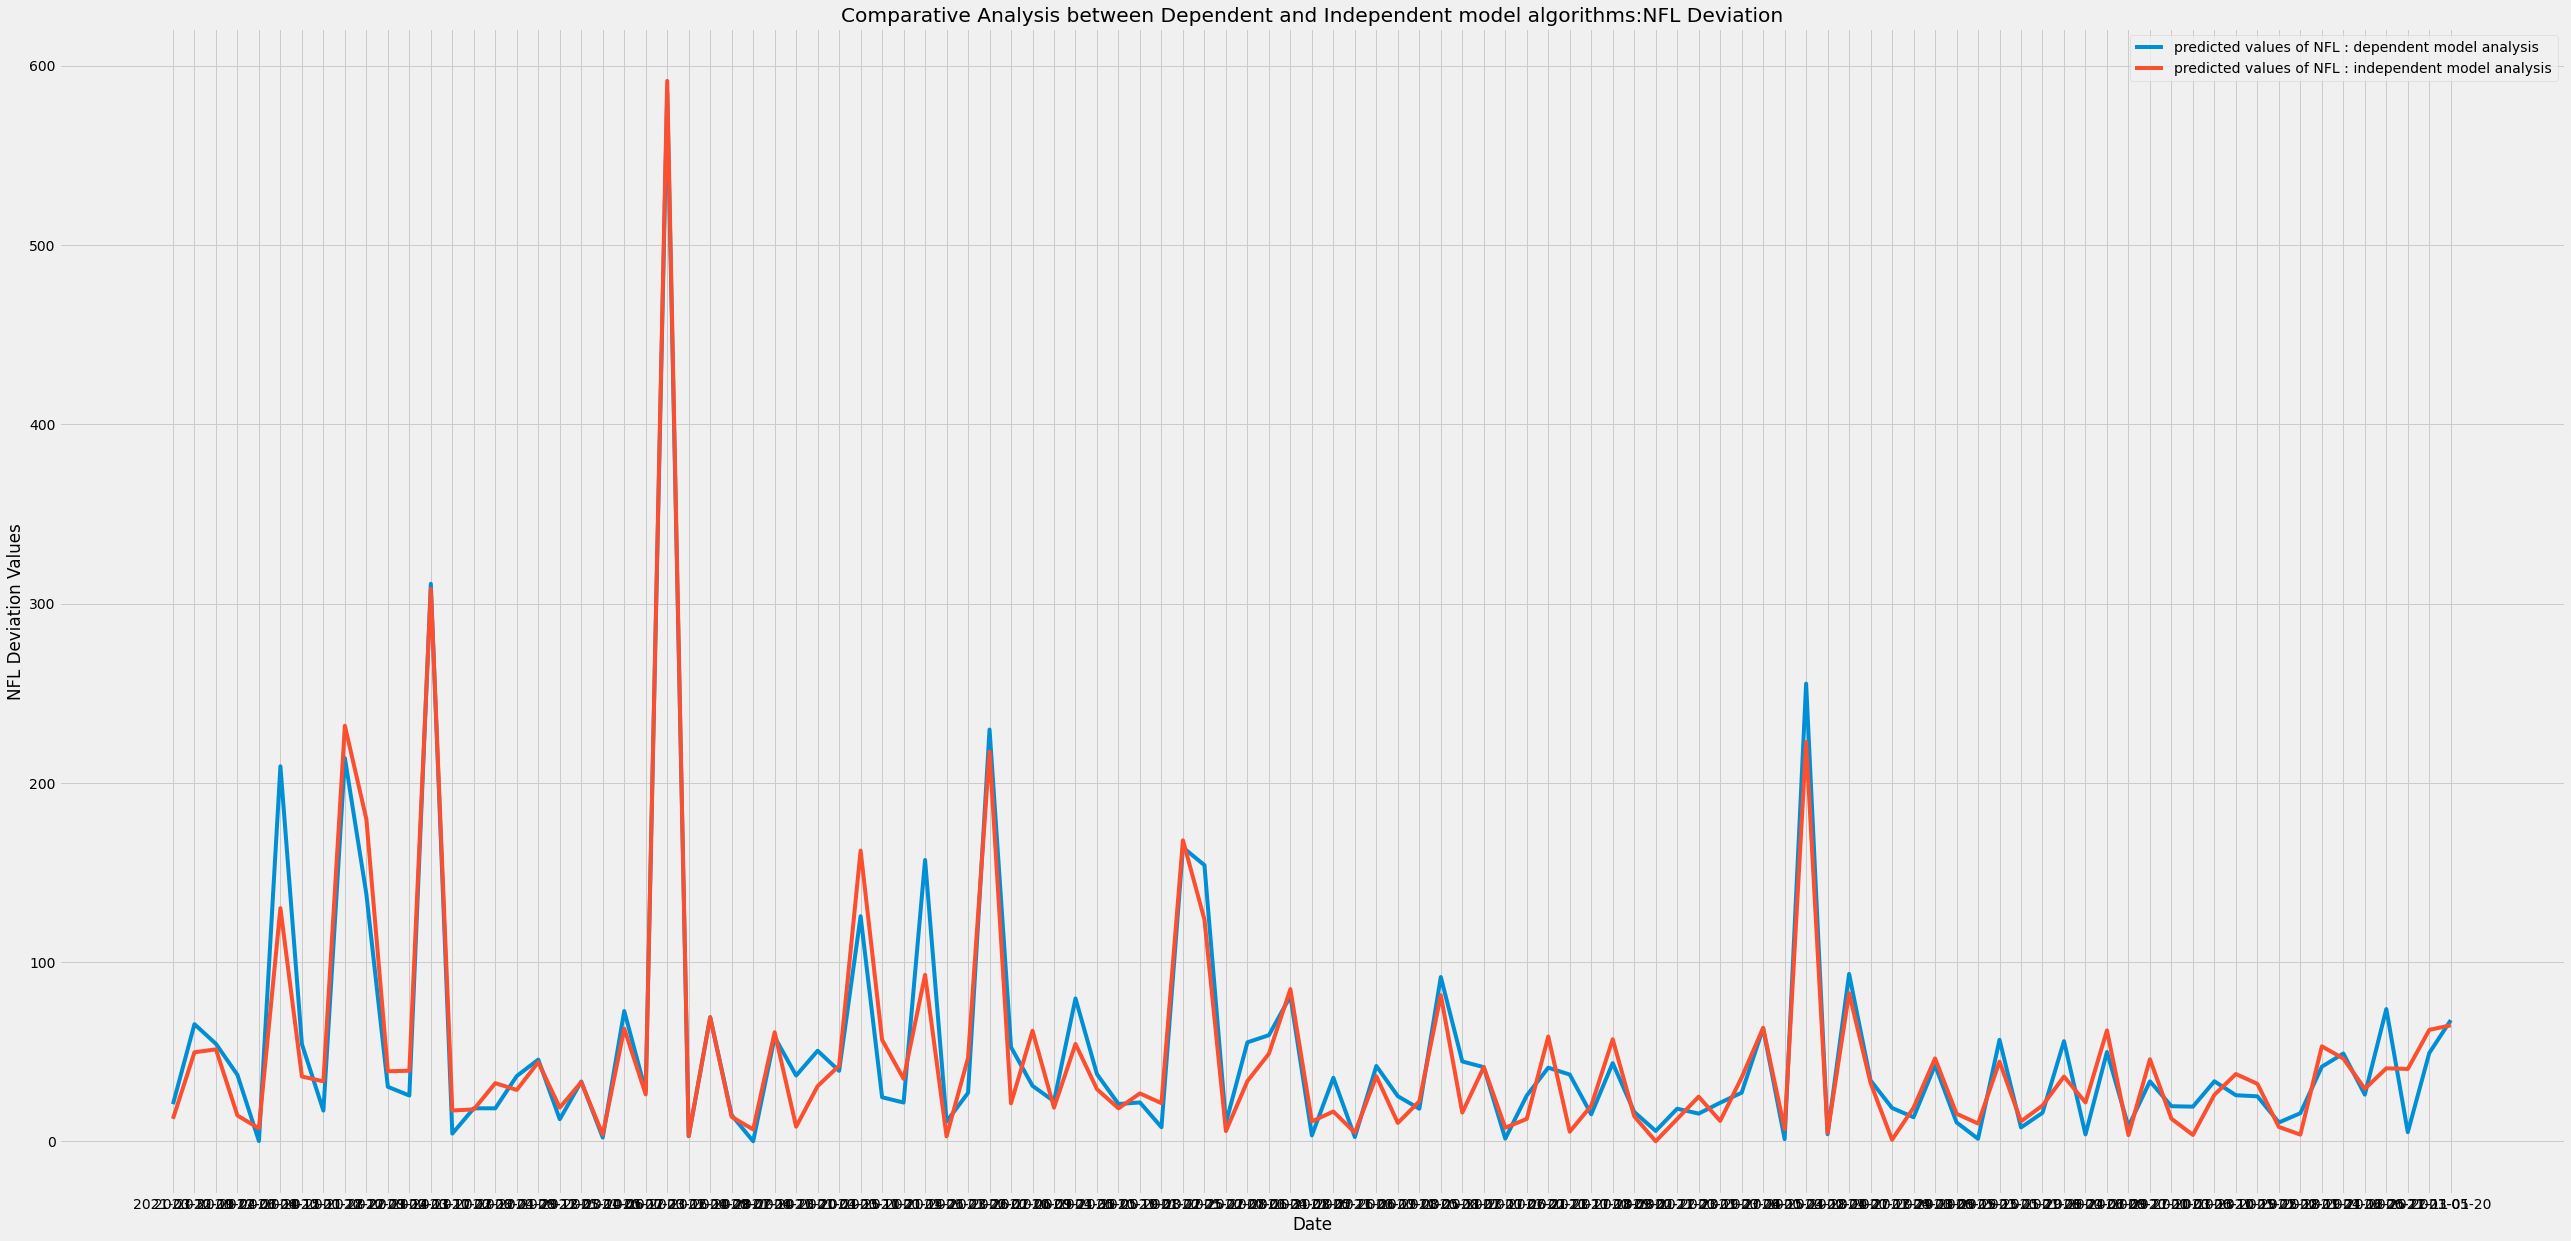

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(date,d['Amount of Deviation:NFL (actual vs prediction)'],label='predicted values of NFL : dependent model analysis')
plt.plot(date,id['Amount of Deviation:NFL (actual vs prediction)'],label='predicted values of NFL : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFL Deviation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Deviation Values')
plt.style.use('fivethirtyeight')
plt.show()

**Based on the above comparative anaylsis graphs sir , one can choose the best model structure/implementation required to train/predict the same**

## **Conclusion**

**I would like to point out that there would be a rare possibility that both the Dependent model analysis.csv, indpendent model analysis.csv would be the same,but due to the fact these models operate using different logic hence the probability of dependent model analysis.csv and independent model analysis.csv would not be the same(i.e there would be a slight difference of values between them), i have enclosed a copy of the datasets for supporting the same sir.**

**Click on the below hyperlinks to download and view the same**


[Dependent Model analysis.csv](https://drive.google.com/file/d/1aRJ5JTjaHI1Ai2SkU2s4j4TtmwlWiGXm/view?usp=sharing)

[Independent Model analysis.csv](https://drive.google.com/file/d/1pvAGc6rYfmoHapBLa4Bzc3D85XVmtX1-/view?usp=sharing)

**Note: Please do run the entire code for all the different types of options offered to perform HPO and then compare the same sir**

**Thank you**

